# テンソル分解

目的　テンソル同士の比較、比較することで、そのテンソルの構成している要素を知る。何が原因となって、その特徴量を出しているのか

https://www.jstage.jst.go.jp/article/journalcpij/53/3/53_1320/_pdf/-char/ja

タッカー分解のコアテンソル、因子の扱い全てある

コアテンソルを一旦一緒にするのではなく、それぞれでどの要素が影響しているのかしっかり見極める必要がある、それぞれの特徴行列の数値からどの要素が影響しているのかこの論文を対象に調べる必要がある。

voilaではクラスタリングすることでより精度を高めるということをしていたが、これの目的は、クラスタリング後、比較することで異常を見つけ出すというのが目的、

卒論完成目標

1、テンソル分解をする（今のところ、コアテンソルが対角要素となっているCP分解を用いてただテンソル分解をする。

２、テンソル分解後の空間軸のコンポーネントを見て、そこの差をとり、空間軸、４つのコンポーネント、4テンソルのそれぞれの差をとり６個、差分テンソルを作る、これが（８６４、４、６）のテンソルになる（テンソルオールは入れなくていいかも）

３、上のテンソルをタッカー分解することでコアテンソル、空間軸コンポーネントを見ることで差分のつまり、テンソルに差をつけている部分の場所を把握することができる、今のところ順調

４、これを時間軸でもやりたいが、差をとるという事ができるのかという点で最初のテンソル分解をタッカー分解に変えて、時間軸の方も探索するというのもありかもしれない、

終わり、どの場所で差がついているか分かれば、そこから一個前の軸に戻り、また同様に、どの部分が大事かを探索することで、元データに戻り、最終的に、実際の数値の差として知る事ができる


# データ処理

## import

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

## データ処理

In [2]:
#CP分解をするとき1
cp=0

In [3]:
#データ読み込み
df_cluster0 = pd.read_csv('./RackEnv_201404-201503.csv') # 学習データの読み込み
df_cluster1 = pd.read_csv('./RackEnv_201504-201603.csv') # 検証データの読み込み
df_cluster2 = pd.read_csv('./RackEnv_201604-201703.csv') # 提出用サンプルデータの読み込み
df_clusterall = pd.read_csv('./RackEnv_201404-201703.csv') # 提出用サンプルデータの読み込み

In [4]:
df_failure=df_cluster0[['MEM_failure']]

In [5]:
#データ削除
df_cluster0 = df_cluster0[['AirIn','AirOut', 'CPU', 'Water']]
df_cluster1 = df_cluster1[['AirIn','AirOut', 'CPU', 'Water']]
df_cluster2 = df_cluster2[['AirIn','AirOut', 'CPU', 'Water']]
df_clusterall = df_clusterall[['AirIn','AirOut', 'CPU', 'Water']]
"""
df_cluster0 = df_cluster0[['CPU', 'Water']]
df_cluster1 = df_cluster1[['CPU', 'Water']]
df_cluster2 = df_cluster2[[ 'CPU', 'Water']]
df_clusterall = df_clusterall[[ 'CPU', 'Water']]
"""

"\ndf_cluster0 = df_cluster0[['CPU', 'Water']]\ndf_cluster1 = df_cluster1[['CPU', 'Water']]\ndf_cluster2 = df_cluster2[[ 'CPU', 'Water']]\ndf_clusterall = df_clusterall[[ 'CPU', 'Water']]\n"

In [6]:
print(df_cluster0)

        AirIn  AirOut    CPU  Water
0       19.84   24.13  16.83  15.65
1       20.11   23.79  16.73  16.16
2       18.97   24.24  16.73  15.44
3       19.63   23.44  16.68  15.36
4       18.95   24.23  16.92  15.21
...       ...     ...    ...    ...
315355  19.25   24.84  17.78  15.77
315356  19.68   23.48  17.45  15.80
315357  19.40   24.45  17.57  15.63
315358  20.69   24.27  17.45  15.99
315359  19.41   25.45  17.78  15.55

[315360 rows x 4 columns]


In [7]:

df_cluster0_sc = preprocessing.scale(df_cluster0, axis=0)
df_cluster1_sc = preprocessing.scale(df_cluster1, axis=0)
df_cluster2_sc = preprocessing.scale(df_cluster2, axis=0)
df_clusterall_sc = preprocessing.scale(df_clusterall, axis=0)


df_cluster0 = df_cluster0.values
df_cluster1 = df_cluster1.values
df_cluster2 = df_cluster2.values
df_clusterall = df_clusterall.values


In [8]:
#テンソル化

ttensor_0 = df_cluster0.reshape(-1, 864, 4)
#print(tensor_0[1,0,0])
ttensor_1 = df_cluster1.reshape(-1, 864, 4)
#print(tensor_1[1,0,0])
ttensor_2 = df_cluster2.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])
ttensor_all = df_clusterall.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])

tensor_0 = df_cluster0_sc.reshape(-1, 864, 4)
#print(tensor_0[1,0,0])
tensor_1 = df_cluster1_sc.reshape(-1, 864, 4)
#print(tensor_1[1,0,0])
tensor_2 = df_cluster2_sc.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])
tensor_all = df_clusterall_sc.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])

In [9]:
#axis=0,奥行,axis=1,行、axis=2,列
"""
tensor_0=np.delete(tensor_0,0,axis=1)
print(tensor_0.shape)
"""

'\ntensor_0=np.delete(tensor_0,0,axis=1)\nprint(tensor_0.shape)\n'

In [10]:
print(tensor_2[0,0,0])
print(tensor_all[0,0,0])


-0.8957643528630549
-0.640381924134048


In [11]:
tensor_failure =df_failure.values.reshape(-1, 864)

In [12]:
print(np.where(tensor_failure == 1))

(array([  2,  21,  22,  30,  39,  43,  45,  53,  55,  55,  57,  74,  75,
        89,  90,  93,  96,  97, 109, 116, 116, 119, 120, 121, 121, 121,
       124, 126, 127, 129, 141, 143, 144, 147, 150, 152, 153, 156, 158,
       163, 170, 179, 184, 189, 190, 199, 202, 211, 222, 224, 237, 246,
       246, 247, 247, 249, 255, 257, 257, 257, 257, 259, 260, 275, 275,
       281, 285, 288, 289, 294, 299, 300, 302, 308, 311, 316, 319, 322,
       329, 332, 333, 335, 337, 338], dtype=int64), array([716,  34, 648, 469, 450, 519, 783, 156, 731, 749, 241, 838, 536,
       524, 734, 208, 654, 160, 630, 770, 780, 493, 439,  25, 605, 670,
       140, 692,   2,  35, 118, 468, 373, 649, 190,  73, 835, 807, 456,
        56,  36, 582, 616, 788, 578, 639, 829, 599,  11, 528, 858, 508,
       783,  77, 659, 544, 457,  17,  23, 410, 472, 364,  72, 537, 754,
       167, 776, 776, 854, 356, 466, 262, 195, 356,  49,  74,  96, 802,
       136, 536, 346, 345,   6, 472], dtype=int64))


# テンソル分解

## import

In [13]:
!pip install -U tensorly

Requirement already up-to-date: tensorly in c:\users\cocon\anaconda3\lib\site-packages (0.8.0)


In [14]:
import tensorly as tl
import numpy as np
from tensorly.decomposition import tucker
from matplotlib import pyplot as plt
from tensorly.base import unfold
from tensorly.tenalg import multi_mode_dot, mode_dot
from tensorly.tucker_tensor import tucker_to_tensor, TuckerTensor, validate_tucker_rank, tucker_normalize
from tensorly.decomposition import non_negative_parafac, non_negative_tucker

## テンソル分解

In [15]:
def non_negative_tucker_core(tensor, rank,mcore, n_iter_max=1000, init='svd', tol=10e-6,
                        random_state=None, verbose=False, return_errors=False,
                        normalize_factors=False):
    """Non-negative Tucker decomposition

        Iterative multiplicative update, see [2]_

    Parameters
    ----------
    tensor : ``ndarray``
    rank : None, int or int list
        size of the core tensor, ``(len(ranks) == tensor.ndim)``
        if int, the same rank is used for all modes
    n_iter_max : int
        maximum number of iteration
    init : {'svd', 'random'}
    random_state : {None, int, np.random.RandomState}
    verbose : int , optional
        level of verbosity
    ranks : None or int list
    size of the core tensor
    normalize_factors : if True, aggregates the core which will contain the norms of the factors.

    Returns
    -------
    core : ndarray
            positive core of the Tucker decomposition
            has shape `ranks`
    factors : ndarray list
            list of factors of the CP decomposition
            element `i` is of shape ``(tensor.shape[i], rank)``

    References
    ----------
    .. [2] Yong-Deok Kim and Seungjin Choi,
       "Non-negative tucker decomposition",
       IEEE Conference on Computer Vision and Pattern Recognition s(CVPR),
       pp 1-8, 2007
    """
    rank = validate_tucker_rank(tl.shape(tensor), rank=rank)

    epsilon = 10e-12

    # Initialisation
    if init == 'svd':
        core, factors = tucker(tensor, rank)
        nn_factors = [tl.abs(f) for f in factors]
        nn_core = tl.abs(core)
    else:
        rng = tl.check_random_state(random_state)
        core = tl.tensor(rng.random_sample(rank) + 0.01, **tl.context(tensor))  # Check this
        factors = [tl.tensor(rng.random_sample(s), **tl.context(tensor)) for s in zip(tl.shape(tensor), rank)]
        nn_factors = [tl.abs(f) for f in factors]
        nn_core = tl.abs(core)

    norm_tensor = tl.norm(tensor, 2)
    rec_errors = []
    nn_core=tl.abs(mcore)#
    for iteration in range(n_iter_max):
        for mode in range(tl.ndim(tensor)):
            B = tucker_to_tensor((nn_core, nn_factors), skip_factor=mode)
            B = tl.transpose(unfold(B, mode))

            numerator = tl.dot(unfold(tensor, mode), B)
            numerator = tl.clip(numerator, a_min=epsilon, a_max=None)
            denominator = tl.dot(nn_factors[mode], tl.dot(tl.transpose(B), B))
            denominator = tl.clip(denominator, a_min=epsilon, a_max=None)
            nn_factors[mode] *= numerator / denominator

        numerator = tucker_to_tensor((tensor, nn_factors), transpose_factors=True)
        numerator = tl.clip(numerator, a_min=epsilon, a_max=None)
        for i, f in enumerate(nn_factors):
            if i:
                denominator = mode_dot(denominator, tl.dot(tl.transpose(f), f), i)
            else:
                denominator = mode_dot(nn_core, tl.dot(tl.transpose(f), f), i)
        denominator = tl.clip(denominator, a_min=epsilon, a_max=None)
        #nn_core *= numerator / denominator

        rec_error = tl.norm(tensor - tucker_to_tensor((nn_core, nn_factors)), 2) / norm_tensor
        rec_errors.append(rec_error)
        if iteration > 1 and verbose:
            print('reconstruction error={}, variation={}.'.format(
                rec_errors[-1], rec_errors[-2] - rec_errors[-1]))

        if iteration > 100 and abs(rec_errors[-2] - rec_errors[-1]) < tol:
            if verbose:
                print('converged in {} iterations.'.format(iteration))
            break
        if normalize_factors:
            nn_core, nn_factors = tucker_normalize((nn_core, nn_factors))
    tensor = TuckerTensor((nn_core, nn_factors))
    if return_errors:
        return tensor, rec_errors
    else:
        print("rec_errors")
        print(rec_errors)
        return tensor


In [16]:
def ntd(tensor,rank_list):
  return non_negative_tucker(tensor, rank_list, tol=1.0e-10, n_iter_max=100)

## プロット

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
def heatfacpltracwiden(t0,t1,t2,t3,m,n):
  plt.figure(figsize=(1*10,1*10))
  a=t0[1][:,m].T.reshape(36,24)
  b=t1[1][:,m].T.reshape(36,24)
  c=t2[1][:,m].T.reshape(36,24)
  d=t3[1][:,m].T.reshape(36,24)
  plt.subplot(n,4,m*4+1)
  sns.heatmap(a,vmin=0, vmax=1)
  plt.subplot(n,4,m*4+2)
  sns.heatmap(b,vmin=0, vmax=1)
  plt.subplot(n,4,m*4+3)
  sns.heatmap(c,vmin=0, vmax=1)
  plt.subplot(n,4,m*4+4)
  sns.heatmap(d,vmin=0, vmax=1)

In [19]:
def heattimeplt(t0,t1,t2,t3):
  plt.figure(figsize=(1*10,1*10))
  plt.subplot(1,4,1)
  sns.heatmap(t0[0][:,:])
  plt.subplot(1,4,2)
  sns.heatmap(t1[0][:,:])
  plt.subplot(1,4,3)
  sns.heatmap(t2[0][:,:])
  plt.subplot(1,4,4)
  sns.heatmap(t3[0][:,:])

特徴ベクトルをひとつめは5以下二つ目は10以下などできないか？

実験で様々な分析が出来るように、棒グラフなどいろいろ入れたい

データフレーム実装

空間軸ヒートマップ〇

時間軸ヒートマップ〇

時間軸線グラフ〇

測定軸ヒートマップと棒グラフ〇

コアテンソルヒートマップもしくは、数値 〇

元データの値を選択からの表示

個別逆テンソル復元をし、元データの特徴を比較

##データフレーム関数

In [20]:
def spaceHeatPlot(b0,b1,b2,b3,rl):
  for num in range(0,rl[1]):
    heatfacpltracwiden(b0,b1,b2,b3,num,rl[1])

In [21]:
def timeHeatPlot(b0,b1,b2,b3,rl):
  heattimeplt(b0,b1,b2,b3)

In [22]:
def timeLinePlot(b0,b1,b2,b3,rl):
  n=rl[0]
  plt.figure(figsize=(1*10,1*10))

  sns.relplot(data=b0[0][:,:], kind='line')
  sns.relplot(data=b1[0][:,:], kind='line')
  sns.relplot(data=b2[0][:,:], kind='line')
  sns.relplot(data=b3[0][:,:], kind='line')

In [23]:
def measureHeatPlot(b0,b1,b2,b3,rl):
  plt.figure(figsize=(1*10,1*10))
  plt.subplot(1,4,1)
  sns.heatmap(b0[2][:,:])
  plt.subplot(1,4,2)
  sns.heatmap(b1[2][:,:])
  plt.subplot(1,4,3)
  sns.heatmap(b2[2][:,:])
  plt.subplot(1,4,4)
  sns.heatmap(b3[2][:,:])

In [24]:
def measureBarPlot(b0,b1,b2,b3,rl):
  plt.figure(figsize=(1*10,1*10))
  plt.subplot(1,4,1)
  sns.barplot(data=b0[2])
  plt.subplot(1,4,2)
  sns.barplot(data=b1[2])
  plt.subplot(1,4,3)
  sns.barplot(data=b2[2])
  plt.subplot(1,4,4)
  sns.barplot(data=b3[2])

In [25]:
def coreHeatMap(a0,a1,a2,a3,rl):
  n=rl[2]
  for m in range(0,rl[2]):
    #heatfacpltracwiden(b0,b1,b2,b3,num,rl[1])
    plt.figure(figsize=(n*10,n*10))
    plt.subplot(n,4,m*4+1)
    sns.heatmap(a0[:,:,m],vmin=0, vmax=1)
    plt.subplot(n,4,m*4+2)
    sns.heatmap(a1[:,:,m],vmin=0, vmax=1)
    plt.subplot(n,4,m*4+3)
    sns.heatmap(a2[:,:,m],vmin=0, vmax=1)
    plt.subplot(n,4,m*4+4)
    sns.heatmap(a3[:,:,m],vmin=0, vmax=1)

In [26]:
def allPlot(a,b,rl):
  plt.subplot(2,3,1)
  sns.heatmap(b[0][:,:])
  plt.subplot(2,3,2)
  sns.heatmap(b[1][:,:])
  plt.subplot(2,3,3)
  sns.heatmap(b[2][:,:])
  for m in range(0,rl[2]):
    plt.subplot(2,3,m+4)
    sns.heatmap(a[:,:,m])

In [27]:
def spaceHeatDif(t0,t1,t2,t3,m,n):
  plt.figure(figsize=(n*10,n*10))
  a=t0[1][:,m].T.reshape(36,24)
  b=t1[1][:,m].T.reshape(36,24)
  c=t2[1][:,m].T.reshape(36,24)
  d=t3[1][:,m].T.reshape(36,24)
  ab=abs(a-b)
  ac=abs(a-c)
  bc=abs(b-c)
  ad=abs(a-d)
  bd=abs(b-d)
  cd=abs(c-d)

  plt.subplot(n,6,m*6+1)
  print("01")
  sns.heatmap(ab,vmin=0, vmax=1)
  plt.subplot(n,6,m*6+2)
  print("02")
  sns.heatmap(ac,vmin=0, vmax=1)
  plt.subplot(n,6,m*6+3)
  print("12")
  sns.heatmap(bc,vmin=0, vmax=1)
  plt.subplot(n,6,m*6+4)
  print("0a")
  sns.heatmap(ad,vmin=0, vmax=1)
  plt.subplot(n,6,m*6+5)
  print("1a")
  sns.heatmap(bd,vmin=0, vmax=1)
  plt.subplot(n,6,m*6+6)
  print("2a")
  sns.heatmap(cd,vmin=0, vmax=1)
  print("誤差")
  print("01")
  print(ab.sum())
  print("02")
  print(ac.sum())
  print("12")
  print(bc.sum())
  print("0a")
  print(ad.sum())
  print("1a")
  print(bd.sum())
  print("2a")
  print(cd.sum()) 

In [28]:
def spaceRowHeatDif(t0,t1,t2,t3):
  plt.figure(figsize=(1*10,1*10))
  a=t0[1][:,:]
  b=t1[1][:,:]
  c=t2[1][:,:]
  d=t3[1][:,:]
  ab=abs(a-b)
  ac=abs(a-c)
  bc=abs(b-c)
  ad=abs(a-d)
  bd=abs(b-d)
  cd=abs(c-d)

  plt.subplot(1,6,1)
  print("01")
  sns.heatmap(ab,vmin=0, vmax=1)
  plt.subplot(1,6,2)
  print("02")
  sns.heatmap(ac,vmin=0, vmax=1)
  plt.subplot(1,6,3)
  print("12")
  sns.heatmap(bc,vmin=0, vmax=1)
  plt.subplot(1,6,4)
  print("0a")
  sns.heatmap(ad,vmin=0, vmax=1)
  plt.subplot(1,6,5)
  print("1a")
  sns.heatmap(bd,vmin=0, vmax=1)
  plt.subplot(1,6,6)
  print("2a")
  sns.heatmap(cd,vmin=0, vmax=1)
  print("誤差")
  print("01")
  print(ab.sum())
  print("02")
  print(ac.sum())
  print("12")
  print(bc.sum())
  print("0a")
  print(ad.sum())
  print("1a")
  print(bd.sum())
  print("2a")
  print(cd.sum()) 

In [29]:
def plotFream(t0,t1,t2,t3,rl):
  tt0,u0=ntd(t0,rl)
  a0,b0=non_negative_tucker_core(t0,rl,tt0)
  a1,b1=non_negative_tucker_core(t1,rl,tt0)
  a2,b2=non_negative_tucker_core(t2,rl,tt0)
  a3,b3=non_negative_tucker_core(t3,rl,tt0)
    
  #spaceHeatPlot(b0,b1,b2,b3,rl)

  #plt.subplot(2,1,1)
  plt.subplot2grid((2, 2), (0, 0), colspan=2)
  spaceHeatPlot(b0,b1,b2,b3,rl)
  plt.title("spaceHeatPlot")
  #plt.subplot(2,1,2)
  plt.subplot2grid((2, 2), (1, 0), colspan=2)
  timeHeatPlot(b0,b1,b2,b3,rl)
  plt.title("timeHeatPlot")
  """
  timeLinePlot(b0,b1,b2,b3,rl)
  plt.title("timeLinePlot")
  measureHeatPlot(b0,b1,b2,b3,rl)
  plt.title("measureHeatPlot")
  measureBarPlot(b0,b1,b2,b3,rl)  
  plt.title("measureBarPlot")
  coreHeatMap(a0,a1,a2,a3,rl)
  plt.title("coreHeatMap")
  allPlot(a0,b0,rl)
  plt.title("allPlot")
  
  """
  """
  n=rl[1]
  for m in range(0,rl[1]):
    spaceHeatDif(b0,b1,b2,b3,m,n)
  """
  #spaceRowHeatDif(b0,b1,b2,b3)

## 実験

変数の固定　測定値の固定をすることでの、時間軸と空間軸の比較、ラック毎の差を見た後、その差を生み出している原因の特定のための元データを戻って比較

In [30]:
rl1=4
rl2=4
rl3=4
rank_list=[rl1,rl2,rl3]

In [31]:
#plotFream(tensor_0,tensor_1,tensor_2,tensor_all,rank_list)

01の820番くらいが差が生まれているからその部分を比較するため、元データの比較と並び替えが必要

In [32]:
if cp==0:
    tt0,u0=ntd(tensor_0,rank_list)
    tt1,u1=ntd(tensor_1,rank_list)
    tt2,u2=ntd(tensor_2,rank_list)
    tt3,u3=ntd(tensor_all,rank_list)

if cp==1:
    tt0=np.zeros((rl1,rl2,rl3))
    tt0[0,0,0]=1
    tt0[1,1,1]=1
    tt0[2,2,2]=1
    tt0[3,3,3]=1



a0,b0=tt0,u0
a1,b1=tt1,u1
a2,b2=tt2,u2
a3,b3=tt3,u3

In [33]:
c1=np.zeros((rl1*rl2*rl3))
c2=np.zeros((rl1*rl2*rl3))
c3=np.zeros((rl1*rl2*rl3))
c4=np.zeros((rl1*rl2*rl3))
count=0
mem=[]
for i in range(0,rl1):
  for j in range(0,rl2):
    for k in range(0,rl3):
      mem.append(str(i)+str(j)+str(k))
      c1[count]=a0[i,j,k]
      c2[count]=a1[i,j,k]
      c3[count]=a2[i,j,k]
      c4[count]=a3[i,j,k] 
      count=count+1


In [34]:
def spaceRowHeatDifOut(t0,t1):
  plt.figure(figsize=(1*10,1*10))
  a=t0[1][:,:]
  b=t1[1][:,:]
  ab=abs(a-b)

  print("01")
  sns.heatmap(ab,vmin=0, vmax=1)

  print("誤差")
  print("01")
  print(ab.sum())
  return ab

In [35]:
print(b2[2][:,0])

[6.84082567e+00 7.50137757e-56 4.24787449e+00 1.39507200e+01]


In [36]:
#軸の無理やり調整用、そのうち違う風にする
b2[1]=b2[1][:,[2,0,1,3]]
b2[2]=b2[2][:,[1,3,0,2]]

print(b2[2][:,1])

[1.62676520e-36 2.87211841e+01 1.46215001e+01 7.39288468e-43]


01
誤差
01
2180.9692805273075
01
誤差
01
3348.0974915816364
01
誤差
01
2748.8509647574137
01
誤差
01
4103.996087644036
01
誤差
01
2352.059596988078
01
誤差
01
4214.420637034112


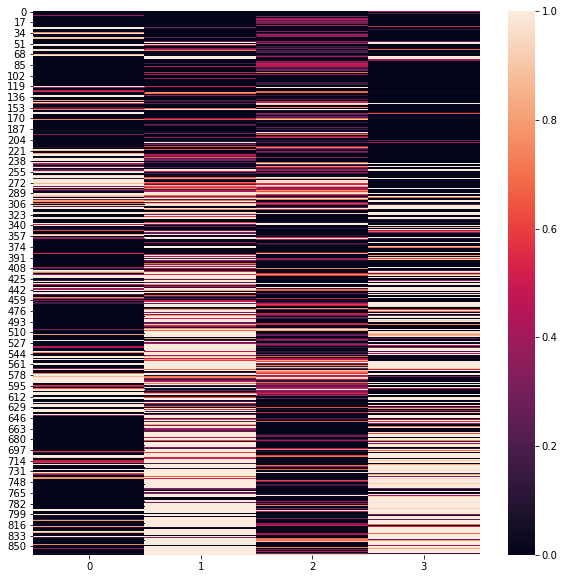

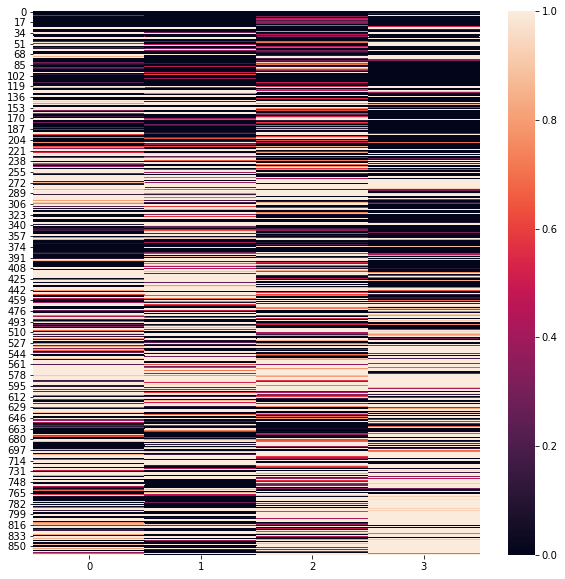

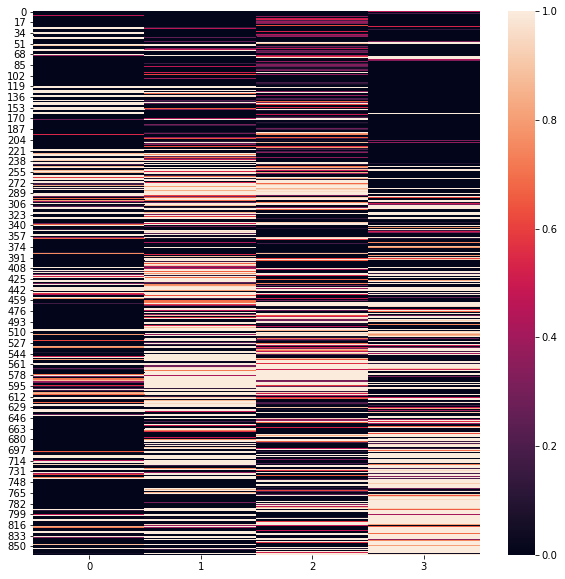

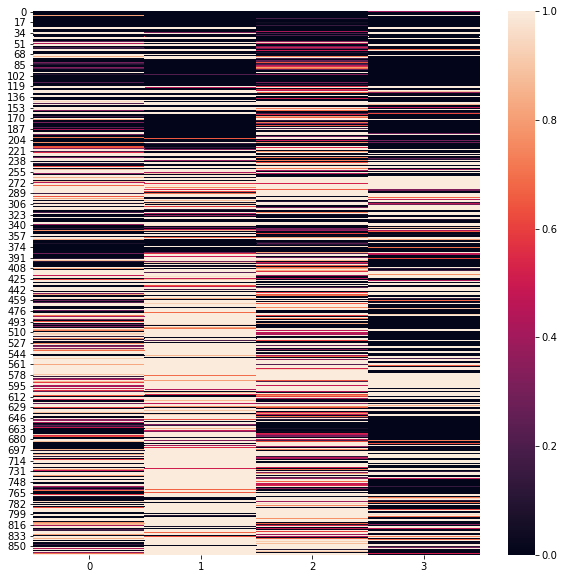

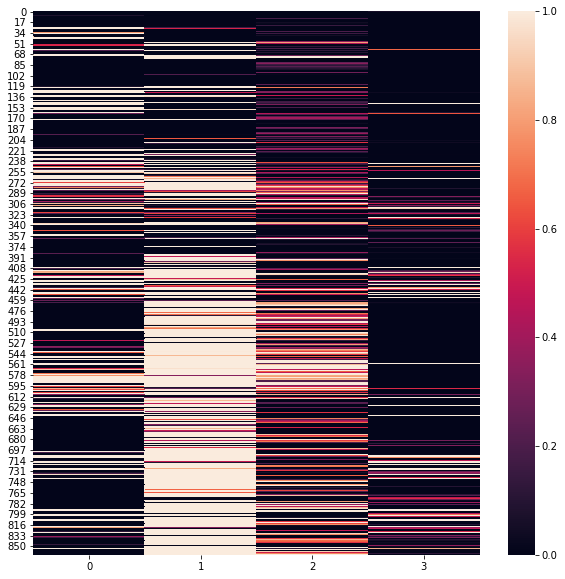

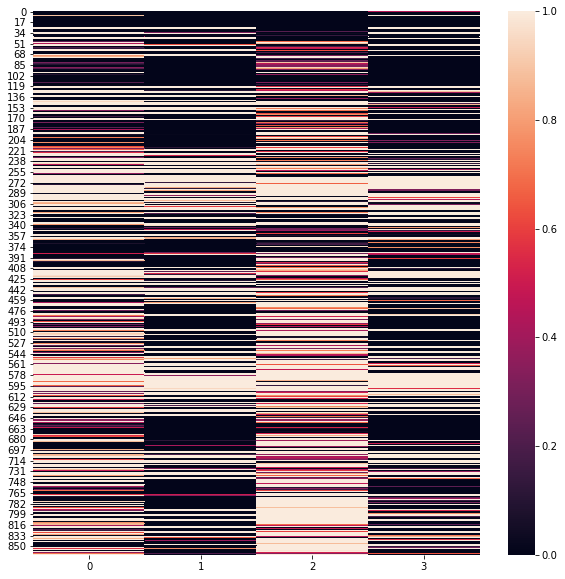

In [37]:
a1=spaceRowHeatDifOut(b0,b1)
a2=spaceRowHeatDifOut(b0,b2)
a3=spaceRowHeatDifOut(b0,b3)
a4=spaceRowHeatDifOut(b1,b2)
a5=spaceRowHeatDifOut(b1,b3)
a6=spaceRowHeatDifOut(b2,b3)

In [38]:
"""
# 二次元配列を3次元方向に結合
diff_array_3d = np.stack([a1,a2,a3,a4,a5,a6], axis=2)
# 形状確認
diff_array_3d.shape
"""

'\n# 二次元配列を3次元方向に結合\ndiff_array_3d = np.stack([a1,a2,a3,a4,a5,a6], axis=2)\n# 形状確認\ndiff_array_3d.shape\n'

In [39]:
#cda3,uda3=ntd(diff_array_3d,rank_list)

In [40]:
"""
d=uda3[0][:,0].T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
sns.heatmap(d)
"""

'\nd=uda3[0][:,0].T.reshape(36,24).T\n#sns.heatmap(d,vmin=0, vmax=1)\nsns.heatmap(d)\n'

In [41]:
"""
left=range(6)
height1=uda3[2][:,1]
p1 = plt.bar(left, height1, linewidth=2)
"""

'\nleft=range(6)\nheight1=uda3[2][:,1]\np1 = plt.bar(left, height1, linewidth=2)\n'

In [42]:
"""
c=np.zeros((64))
count=0
mem=[]
for i in range(0,4):
  for j in range(0,4):
    for k in range(0,4):
      mem.append(str(i)+str(j)+str(k))
      c[count]=cda3[i,j,k]
      count=count+1

plt.figure(figsize=(4*10,2*10))
left=range(64)
height1=c
plt.xticks(left, mem)
p1 = plt.bar(left, height1, linewidth=2)
"""

'\nc=np.zeros((64))\ncount=0\nmem=[]\nfor i in range(0,4):\n  for j in range(0,4):\n    for k in range(0,4):\n      mem.append(str(i)+str(j)+str(k))\n      c[count]=cda3[i,j,k]\n      count=count+1\n\nplt.figure(figsize=(4*10,2*10))\nleft=range(64)\nheight1=c\nplt.xticks(left, mem)\np1 = plt.bar(left, height1, linewidth=2)\n'

上のコアテンソルのグラフから、他の軸の因子ごとの特徴を作っているところをうまく探していき、どこが大事か見ていく


000,122,011この３つが上から3番までこの３つから調査をしていく

In [43]:
"""
left=range(864)
plt.figure(figsize=(4*10,2*10))
height1=uda3[0][:,0]
height2=uda3[0][:,1]
height3=uda3[0][:,2]
height4=uda3[0][:,3]
plt.subplot(1,2,2)
p1 = plt.bar(left, height1, linewidth=2)
p2 = plt.bar(left, height2, linewidth=2)
p3 = plt.bar(left, height3, linewidth=2)
p4 = plt.bar(left, height4, linewidth=2)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)
"""

'\nleft=range(864)\nplt.figure(figsize=(4*10,2*10))\nheight1=uda3[0][:,0]\nheight2=uda3[0][:,1]\nheight3=uda3[0][:,2]\nheight4=uda3[0][:,3]\nplt.subplot(1,2,2)\np1 = plt.bar(left, height1, linewidth=2)\np2 = plt.bar(left, height2, linewidth=2)\np3 = plt.bar(left, height3, linewidth=2)\np4 = plt.bar(left, height4, linewidth=2)\nplt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)\n'

In [44]:
"""
max_index = np.argmax(uda3[0][:,3])
print(max_index)
"""

'\nmax_index = np.argmax(uda3[0][:,3])\nprint(max_index)\n'

第一因子は２７３ 第二因子は551、第３因子565、第４因子410となっている。

空間軸に関しては量が多すぎるため、要素ごとで上から見ていく

In [45]:
"""
plt.figure(figsize=(4*10,2*10))
 
# 各系列のデータを用意
height1=uda3[1][:,0]
height2=uda3[1][:,1]
height3=uda3[1][:,2]
height4=uda3[1][:,3]
data = [height1, height2,height3,height4]

x = np.arange(len(height1))

labels = ["1", "2", "3", "4"]
# マージンを設定
margin = 0.2  #0 <margin< 1
totoal_width = 1 - margin
 
# 棒グラフをプロット
for i, h in enumerate(data):
  pos = x - totoal_width *( 1- (2*i+1)/len(data) )/2
  plt.bar(pos, h, width = totoal_width/len(data))
 
# ラベルの設定
plt.xticks(x, labels)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)
"""

'\nplt.figure(figsize=(4*10,2*10))\n \n# 各系列のデータを用意\nheight1=uda3[1][:,0]\nheight2=uda3[1][:,1]\nheight3=uda3[1][:,2]\nheight4=uda3[1][:,3]\ndata = [height1, height2,height3,height4]\n\nx = np.arange(len(height1))\n\nlabels = ["1", "2", "3", "4"]\n# マージンを設定\nmargin = 0.2  #0 <margin< 1\ntotoal_width = 1 - margin\n \n# 棒グラフをプロット\nfor i, h in enumerate(data):\n  pos = x - totoal_width *( 1- (2*i+1)/len(data) )/2\n  plt.bar(pos, h, width = totoal_width/len(data))\n \n# ラベルの設定\nplt.xticks(x, labels)\nplt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)\n'

因子のテンソル分解の結果より、重要なのは第一因子は2,第二因子は3、第三因子は4、第四因子は1が大事としっかり分かれている。

In [46]:
"""
plt.figure(figsize=(4*10,2*10))
 
# 各系列のデータを用意
height1=uda3[2][:,0]
height2=uda3[2][:,1]
height3=uda3[2][:,2]
height4=uda3[2][:,3]
data = [height1, height2,height3,height4]

x = np.arange(len(height1))

labels = ["01", "02", "03", "12","13","23"]
# マージンを設定
margin = 0.2  #0 <margin< 1
totoal_width = 1 - margin
 
# 棒グラフをプロット
for i, h in enumerate(data):
  pos = x - totoal_width *( 1- (2*i+1)/len(data) )/2
  plt.bar(pos, h, width = totoal_width/len(data))
 
# ラベルの設定
plt.xticks(x, labels)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)
"""

'\nplt.figure(figsize=(4*10,2*10))\n \n# 各系列のデータを用意\nheight1=uda3[2][:,0]\nheight2=uda3[2][:,1]\nheight3=uda3[2][:,2]\nheight4=uda3[2][:,3]\ndata = [height1, height2,height3,height4]\n\nx = np.arange(len(height1))\n\nlabels = ["01", "02", "03", "12","13","23"]\n# マージンを設定\nmargin = 0.2  #0 <margin< 1\ntotoal_width = 1 - margin\n \n# 棒グラフをプロット\nfor i, h in enumerate(data):\n  pos = x - totoal_width *( 1- (2*i+1)/len(data) )/2\n  plt.bar(pos, h, width = totoal_width/len(data))\n \n# ラベルの設定\nplt.xticks(x, labels)\nplt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)\n'

第一因子は03、13,第二因子は12,第三因子は23,02、第四因子は01が大事となっている。

この後は空間の方も見て、コアテンソルと比較しながらどこが大事か見て、一個前のテンソルに戻り、次に時間軸と空間軸を見ながら、元データに戻り、分析する必要がある。

できるだけ絞るために一個前に戻った際に時間軸のデータを削減し、よりはっきりと違いがわかる部分を探し当てる必要がある。

差をとった軸は第一因子は03、13,第二因子は12,第三因子は23,02、第四因子は01

因子の軸、第一因子は2,第二因子は3、第三因子は4、第四因子は1

空間軸は第一因子は２７３ 第二因子は551、第３因子565、第４因子410となっている。

コアテンソルは000,122,011　軸順は1番目空間軸、2番目因子軸、3番目差軸



よって上より空間軸273、因子2の差03にとても大きな差がある。
次は、テンソル０、3のテンソル分解を行なって差だけでなく、範囲を縮めていく

In [47]:
mem=[]
for i in range(0,rl1):
  for j in range(0,rl2):
    for k in range(0,rl3):
      mem.append(str(i)+str(j)+str(k))


In [48]:
print(len(mem))
print(type(mem[1]))

64
<class 'str'>


In [49]:
print(b1[1].shape)

(864, 4)


上のプログラム後は、実データの方の可視化を行う、できれば、範囲を指定して、ヒートマップも載せる
ヒートマップは要らないから、どちらかと言ったら先に、表示した二つのテンソルから重要な事が起きている部分を探索できるように選択した部分のデータ化が必要な気がする。

上のボケからデータで比べたいところ、をゲットしたのでそこのヒートマッププロット、元データに戻っての折れ線プロットまでしたい。

In [50]:
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, CustomJS, Slider, Select, HoverTool
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot

TOOLS = "box_select,help,reset"




u4=range(6)
source4 = ColumnDataSource(data={'0' : a1[:,0],'1' : a2[:,0],'2' : a3[:,0],'3' : a4[:,0],'4' : a5[:,0],'5' : a6[:,0],'6' : a1[:,1],'7' : a2[:,1],'8' : a3[:,1],'9' : a4[:,1],'10' : a5[:,1],'11' : a6[:,1],'12' : a1[:,2],'13' : a2[:,2],'14' : a3[:,2],'15' : a4[:,2],'16' : a5[:,2],'17' : a6[:,2],'18' : a1[:,3],'19' : a2[:,3],'20' : a3[:,3],'21' : a4[:,3],'22' : a5[:,3],'23' : a6[:,3]})

source5 = ColumnDataSource(data={'0' : c1,'1' : c2,'2' : c3,'3' : c4})

#u6=range(len(b0[0][:,0]))
source60 = ColumnDataSource(data={'0' : b0[0][:,0],'1' : b0[0][:,1],'2' : b0[0][:,2],'3' : b0[0][:,3]})
source61 = ColumnDataSource(data={'0' : b1[0][:,0],'1' : b1[0][:,1],'2' : b1[0][:,2],'3' : b1[0][:,3]})
source62 = ColumnDataSource(data={'0' : b2[0][:,0],'1' : b2[0][:,1],'2' : b2[0][:,2],'3' : b2[0][:,3]})
source63 = ColumnDataSource(data={'0' : b3[0][:,0],'1' : b3[0][:,1],'2' : b3[0][:,2],'3' : b3[0][:,3]})


u7=range(len(b0[1][:,0]))
source70 = ColumnDataSource(data={'0' : b0[1][:,0],'1' : b0[1][:,1],'2' : b0[1][:,2],'3' : b0[1][:,3]})
source71 = ColumnDataSource(data={'0' : b1[1][:,0],'1' : b1[1][:,1],'2' : b1[1][:,2],'3' : b1[1][:,3]})
source72 = ColumnDataSource(data={'0' : b2[1][:,0],'1' : b2[1][:,1],'2' : b2[1][:,2],'3' : b2[1][:,3]})
source73 = ColumnDataSource(data={'0' : b3[1][:,0],'1' : b3[1][:,1],'2' : b3[1][:,2],'3' : b3[1][:,3]})

u8=range(len(b0[2][:,0]))
source80 = ColumnDataSource(data={'0' : b0[2][:,0],'1' : b0[2][:,1],'2' : b0[2][:,2],'3' : b0[2][:,3]})
source81 = ColumnDataSource(data={'0' : b1[2][:,0],'1' : b1[2][:,1],'2' : b1[2][:,2],'3' : b1[2][:,3]})
source82 = ColumnDataSource(data={'0' : b2[2][:,0],'1' : b2[2][:,1],'2' : b2[2][:,2],'3' : b2[2][:,3]})
source83 = ColumnDataSource(data={'0' : b3[2][:,0],'1' : b3[2][:,1],'2' : b3[2][:,2],'3' : b3[2][:,3]})




l1=range(len(tensor_0[0,:,0]))
d1 = {str(s): tensor_0[:,s,0] for s in l1}
sourceT1=ColumnDataSource(data=d1)

d2 = {str(s): tensor_1[:,s,0] for s in l1}
sourceT2=ColumnDataSource(data=d2)

d3 = {str(s): tensor_2[:,s,0] for s in l1}
sourceT3=ColumnDataSource(data=d3)

d4 = {str(s): tensor_all[:,s,0] for s in l1}
sourceT4=ColumnDataSource(data=d4)


s1 = ColumnDataSource(data=dict(x=u1, y=[]))
p1 = figure(width=400, height=400,title="core1", tools=TOOLS)
p1.vbar(x='x', top='y', source=s1, alpha=0.6)



s2 = ColumnDataSource(data=dict(x=u2, y=[]))
p2 = figure(width=400, height=400,title="core2", tools=TOOLS)
p2.vbar('x', 1,'y', source=s2, alpha=0.6)

s3 = ColumnDataSource(data=dict(x=u3, y=[]))
p3 = figure(width=400, height=400, title="core3", tools=TOOLS)
p3.vbar('x',1, 'y', source=s3, alpha=0.6)

v4=np.zeros(len(u4))
s4 = ColumnDataSource(data=dict(x=u4, y=v4))
p4 = figure(width=200, height=300, title="Difference", tools=TOOLS)
p4.vbar('x',1,'y', source=s4,color="#808080")

p4.toolbar.logo = None
p4.toolbar_location = None

s7 = ColumnDataSource(data=dict(x=mem, y=c1))
p5 = figure(x_range=mem,width=1200, height=300, title="MainCore", tools=TOOLS,
              background_fill_color="#fafafa")
p5.vbar('x',1, 'y', source=s7,color="#696969")

p5.toolbar.logo = None
p5.toolbar_location = None

hover_tool = HoverTool(
    tooltips=[
        ("name", '@x')
    ],
    formatters={
        "time": "datetime",

    },
    mode='vline'
)

p5.tools.append(hover_tool)

s8 = ColumnDataSource(data=dict(x=mem, y=[]))
p6 = figure(x_range=mem,width=1000, height=400, title="core", tools=TOOLS,
              background_fill_color="#fafafa")
p6.vbar('x',1, 'y', source=s8)
    
s5 = ColumnDataSource(data=dict(x=[], y=[]))
s5.data["x"].append(0)
s6 = ColumnDataSource(data=dict(x=[], y=[]))
s6.data["x"].append(0)

s5inds = ColumnDataSource(data=dict(x=[], y=[]))
s5inds.data["x"].append(0)

s9 = ColumnDataSource(data=dict(x=[], y=[]))
p9 = figure(width=200, height=150,title="FirstTensorTime", tools=TOOLS)
p9.vbar('x',1, 'y', source=s9,color="#517fe6")

p9.tools.append(hover_tool)

p9.toolbar.logo = None
p9.toolbar_location = None

s10 = ColumnDataSource(data=dict(x=u7, y=[]))
p10 = figure(width=300, height=150,title="FirstTensorSpace", tools=TOOLS)
p10.vbar('x', 1,'y', source=s10,color="#93dc6f")

p10.tools.append(hover_tool)

p10.toolbar.logo = None
p10.toolbar_location = None

s11 = ColumnDataSource(data=dict(x=u8, y=[]))
p11 = figure(width=200, height=150, title="FirstTensorMeasure", tools=TOOLS)
p11.vbar('x',1, 'y', source=s11,color="#f4949f")

p11.tools.append(hover_tool)

p11.toolbar.logo = None
p11.toolbar_location = None

s12 = ColumnDataSource(data=dict(x=[], y=[]))
p12 = figure(width=200, height=150,title="SecondTensorTime", tools=TOOLS)
p12.vbar('x',1,'y', source=s12,color="#517fe6")

p12.tools.append(hover_tool)


p12.toolbar.logo = None
p12.toolbar_location = None

s13 = ColumnDataSource(data=dict(x=u7, y=[]))
p13 = figure(width=300, height=150,title="SecondTensorSpace", tools=TOOLS)
p13.vbar('x', 1,'y', source=s13,color="#93dc6f")

p13.tools.append(hover_tool)

p13.toolbar.logo = None
p13.toolbar_location = None

s14 = ColumnDataSource(data=dict(x=u8, y=[]))
p14 = figure(width=200, height=150, title="SecondTensorMeasure", tools=TOOLS,background_fill_color="#fafafa")
p14.vbar('x',1, 'y', source=s14,color="#f4949f")

p14.tools.append(hover_tool)

p14.toolbar.logo = None
p14.toolbar_location = None

sdt = ColumnDataSource(data=dict(x=[], y=[]))
pdt = figure(width=200, height=300,title="DifferenceTensorTime", tools=TOOLS)
pdt.vbar('x',1,'y', source=sdt,color="#1845aa")

pdt.tools.append(hover_tool)

pdt.toolbar.logo = None
pdt.toolbar_location = None

sds = ColumnDataSource(data=dict(x=u7, y=[]))
pds = figure(width=300, height=300,title="DifferenceTensorSpace", tools=TOOLS)
pds.vbar('x', 1,'y', source=sds,color="#53a22a")

pds.tools.append(hover_tool)
pds.toolbar.logo = None
pds.toolbar_location = None

sdm = ColumnDataSource(data=dict(x=u8, y=[]))
pdm = figure(width=200, height=300, title="DifferenceTensorMeasure", tools=TOOLS)
pdm.vbar('x',1, 'y', source=sdm,color="#f25a6b")

pdm.tools.append(hover_tool)

pdm.toolbar.logo = None
pdm.toolbar_location = None

s15=ColumnDataSource(data=dict(time=[], space=[],measure=[]))

s16=ColumnDataSource(data=dict(time=[], space=[],measure=[]))
    
s9.selected.js_on_change('indices', CustomJS(args=dict(s=s9,s1=s15), code="""
        const inds = s.selected.indices;
        const d12 = s1.data;
        
        d12['time'] = [];
        for (let i = 0; i < inds.length; i++) {
            d12['time'].push(inds[i]);
        }
        console.log(s1.data['time'])
        s1.change.emit();

"""))



s10.selected.js_on_change('indices', CustomJS(args=dict(s=s10,s1=s15), code="""
        const inds = s.selected.indices;
        const d12 = s1.data;
        
        d12['space'] = [];
        for (let i = 0; i < inds.length; i++) {
            d12['space'].push(inds[i]);
        }
        console.log(s1.data['space'])
        s1.change.emit();

"""))

s11.selected.js_on_change('indices', CustomJS(args=dict(s=s11,s1=s15), code="""
        const inds = s.selected.indices;
        const d12 = s1.data;
        
        d12['measure'] = [];
        for (let i = 0; i < inds.length; i++) {
            d12['measure'].push(inds[i]);
        }
        console.log(s1.data['measure'])
        s1.change.emit();

"""))

s12.selected.js_on_change('indices', CustomJS(args=dict(s=s12,s1=s16), code="""
        const inds = s.selected.indices;
        const d12 = s1.data;
        
        d12['time'] = [];
        for (let i = 0; i < inds.length; i++) {
            d12['time'].push(inds[i]);
        }
        console.log(s1.data['time'])
        s1.change.emit();

"""))

s13.selected.js_on_change('indices', CustomJS(args=dict(s=s13,s1=s16), code="""
        const inds = s.selected.indices;
        const d12 = s1.data;
        
        d12['space'] = [];
        for (let i = 0; i < inds.length; i++) {
            d12['space'].push(inds[i]);
        }
        console.log(s1.data['space'])
        s1.change.emit();

"""))

s14.selected.js_on_change('indices', CustomJS(args=dict(s=s14,s1=s16), code="""
        const inds = s.selected.indices;
        const d12 = s1.data;
        
        d12['measure'] = [];
        for (let i = 0; i < inds.length; i++) {
            d12['measure'].push(inds[i]);
        }
        console.log(s1.data['measure'])
        s1.change.emit();

"""))

sdt.selected.js_on_change('indices', CustomJS(args=dict(s=sdt), code="""
        const inds = s.selected.indices;

        console.log(inds);

"""))

sds.selected.js_on_change('indices', CustomJS(args=dict(s=sds), code="""
        const inds = s.selected.indices;

        console.log(inds);

"""))

sdm.selected.js_on_change('indices', CustomJS(args=dict(s=sdm), code="""
        const inds = s.selected.indices;

        console.log(inds);

"""))


s7.selected.js_on_change('indices', CustomJS(args=dict(s=s7,s5inds=s5inds,s4=s4,source4=source4,m=mem,s1=s9,source60=source60,source61=source61,source62=source62,source63=source63,s2=s10,source70=source70,source71=source71,source72=source72,source73=source73,s3=s11,source80=source80,source81=source81,source82=source82,source83=source83,s5=s5,sds=sds,sdt=sdt,sdm=sdm), code="""
        const inds = s.selected.indices;
        const S5inds=s5inds.data;
        S5inds["x"][0]=inds[0];
        s5inds.change.emit();
        const d = s.data;
        console.log(parseInt(Number(m[inds[0]])/100));
        console.log(parseInt((Number(m[inds[0]])/10)%10));
        console.log(Number(m[inds[0]])%10);
        
        const A1=parseInt(Number(m[inds[0]])/100);
        const d60 = source60.data;
        const d61 = source61.data;
        const d62 = source62.data;
        const d63 = source63.data;
        
        const d12 = s1.data;
        d12['x']=[];
        d12['y'] = [];
        
        
        const ddt = sdt.data;
        ddt['x']=[];
        ddt['y'] = [];
        
        
        const A2=parseInt((Number(m[inds[0]])/10)%10);
        const d70 = source70.data;
        const d71 = source71.data;
        const d72 = source72.data;
        const d73 = source73.data;

        const d22 = s2.data;
        d22['y'] = [];
        
        const dds = sds.data;
        dds['y'] = [];
        
        const A3=parseInt(Number(m[inds[0]])%10);
        const d80 = source80.data;
        const d81 = source81.data;
        const d82 = source82.data;
        const d83 = source83.data;
        
        const d32 = s3.data;
        d32['y'] = [];
        
        const ddm = sdm.data;
        ddm['y'] = [];
        
        let q=0;
        let r=0;
        
        const S5=s5.data;
        console.log(S5['x'][0]);
        switch(S5['x'][0]){
            case 0:
                q=0;
                r=1;
                console.log(S5['x'][0]);
                for (let i = 0; i < d60[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d60[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d70[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d80[A3][i]);
                }
                for (let i = 0; i < Math.min(d60[A1].length,d61[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d60[A1][i]-d61[A1][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d70[A2][i]-d71[A2][i]);
                }
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d80[A3][i]-d81[A3][i]);
                }
                break;
            case 1:
                q=0;
                r=2;
                for (let i = 0; i < d60[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d60[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d70[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d80[A3][i]);
                }
                for (let i = 0; i < Math.min(d60[A1].length,d62[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d60[A1][i]-d62[A1][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d70[A2][i]-d72[A2][i]);
                }
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d80[A3][i]-d82[A3][i]);
                }
                break;
            case 2:
                q=0;
                r=3;
                for (let i = 0; i < d60[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d60[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d70[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d80[A3][i]);
                }
                for (let i = 0; i < Math.min(d60[A1].length,d63[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d60[A1][i]-d63[A1][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d70[A2][i]-d73[A2][i]);
                }
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d80[A3][i]-d83[A3][i]);
                }
                break;
            case 3:
                q=1;
                r=2;
                for (let i = 0; i < d61[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d61[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d71[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d81[A3][i]);
                }
                for (let i = 0; i < Math.min(d61[A1].length,d62[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d61[A1][i]-d62[A1][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d71[A2][i]-d72[A2][i]);
                }
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d81[A3][i]-d82[A3][i]);
                }
                break;
            case 4:
                q=1;
                r=3;
                for (let i = 0; i < d61[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d61[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d71[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d81[A3][i]);
                }
                for (let i = 0; i < Math.min(d61[A1].length,d63[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d61[A1][i]-d63[A1][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d71[A2][i]-d73[A2][i]);
                }
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d81[A3][i]-d83[A3][i]);
                }
                break;
            case 5:
                q=2;
                r=3;
                for (let i = 0; i < d62[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d62[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d72[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d82[A3][i]);
                }
                for (let i = 0; i < Math.min(d62[A1].length,d63[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d62[A1][i]-d63[A1][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d72[A2][i]-d73[A2][i]);
                }
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d82[A3][i]-d83[A3][i]);
                }
                break;
            default:
                console.log('hi');
                break;
                   
        }

        s1.change.emit();
        s2.change.emit();
        s3.change.emit();
        sds.change.emit();
        sdt.change.emit();
        sdm.change.emit();
        
        const d41=source4.data;
        const d42=s4.data;
        d42['y'][0]=0;
        d42['y'][1]=0;
        d42['y'][2]=0;
        d42['y'][3]=0;
        d42['y'][4]=0;
        d42['y'][5]=0;
        const p=6*A2;
        for (let i = 0; i < d41[p].length; i++) {
            d42['y'][0]=d42['y'][0]+d41[p][i]*d41[p][i];
            d42['y'][1]=d42['y'][1]+d41[p+1][i]*d41[p+1][i];
            d42['y'][2]=d42['y'][2]+d41[p+2][i]*d41[p+2][i];
            d42['y'][3]=d42['y'][3]+d41[p+3][i]*d41[p+3][i];
            d42['y'][4]=d42['y'][4]+d41[p+4][i]*d41[p+4][i];
            d42['y'][5]=d42['y'][5]+d41[p+5][i]*d41[p+5][i];
            
        }
        Math.sqrt(d42['y'][0]);
        Math.sqrt(d42['y'][1]);
        Math.sqrt(d42['y'][2]);
        Math.sqrt(d42['y'][3]);
        Math.sqrt(d42['y'][4]);
        Math.sqrt(d42['y'][5]);
        s4.change.emit();



"""))

s7.selected.js_on_change('indices', CustomJS(args=dict(s=s7,m=mem,s1=s12,source60=source60,source61=source61,source62=source62,source63=source63,s2=s13,source70=source70,source71=source71,source72=source72,source73=source73,s3=s14,source80=source80,source81=source81,source82=source82,source83=source83,s5=s5), code="""
        const inds = s.selected.indices;
        const d = s.data;
        console.log(parseInt(Number(m[inds[0]])/100));
        console.log(parseInt((Number(m[inds[0]])/10)%10));
        console.log(Number(m[inds[0]])%10);
        
        const A1=parseInt(Number(m[inds[0]])/100);
        const d60 = source60.data;
        const d61 = source61.data;
        const d62 = source62.data;
        const d63 = source63.data;
        
        const d12 = s1.data;
        d12['x']=[];
        d12['y'] = [];
        
        
        
        
        
        const A2=parseInt((Number(m[inds[0]])/10)%10);
        const d70 = source70.data;
        const d71 = source71.data;
        const d72 = source72.data;
        const d73 = source73.data;

        const d22 = s2.data;
        d22['y'] = [];
        
        
        
        const A3=parseInt(Number(m[inds[0]])%10);
        const d80 = source80.data;
        const d81 = source81.data;
        const d82 = source82.data;
        const d83 = source83.data;
        
        const d32 = s3.data;
        d32['y'] = [];
        
        let q=0;
        let r=0;
        
        const S5=s5.data;
        console.log(S5['x'][0]);
        switch(S5['x'][0]){
            case 0:
                q=0;
                r=1;
                console.log(S5['x'][0]);
                for (let i = 0; i < d61[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d61[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d71[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d81[A3][i]);
                }
                break;
            case 1:
                q=0;
                r=2;
                for (let i = 0; i < d62[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d62[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d72[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d82[A3][i]);
                }
                break;
            case 2:
                q=0;
                r=3;
                for (let i = 0; i < d63[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d63[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d73[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d83[A3][i]);
                }
                break;
            case 3:
                q=1;
                r=2;
                for (let i = 0; i < d62[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d62[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d72[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d82[A3][i]);
                }
                break;
            case 4:
                q=1;
                r=3;
                for (let i = 0; i < d63[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d63[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d73[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d83[A3][i]);
                }
                break;
            case 5:
                q=2;
                r=3;
                for (let i = 0; i < d63[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d63[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d73[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d83[A3][i]);
                }
                break;
            default:
                console.log('hi');
                break;
                   
        }

        s1.change.emit();
        s2.change.emit();
        s3.change.emit();
        



"""))

s3.selected.js_on_change('indices', CustomJS(args=dict(s=s3,s4=s4,s5=s5,s6=s6,source4=source4,s7=s7,source5=source5,s8=s8), code="""
        const inds = s.selected.indices;
        const d = s.data;
        const S5=s5.data;
        S5['x'][0]=inds[0];
        const S6=s6.data;
        const d41=source4.data;
        const d42=s4.data;
        const p=S5['x'][0]+6*S6['x'][0];
        for (let i = 0; i < d42['x'].length; i++) {
            if(d42['y'][i]>0){
                d42['y'][i]=d41[p][i];
            }
        }
        console.log(p);        
        s5.change.emit();
        s4.change.emit();
        
        const S7=s7.data;
        const S8=s8.data;
        const d5=source5.data;
        const q=0;
        const r=0;
        
        console.log(S5['x'][0]);
        switch(S5['x'][0]){
            case '0':
                q=0;
                r=1;
                break;
            case '1':
                q=0;
                r=2;
                break;
            case '2':
                q=0;
                r=3;
                break;
            case '3':
                q=1;
                r=2;
                break;
            case '4':
                q=1;
                r=3;
                break;
            case '5':
                q=2;
                r=3;
                break;
            default:
                break;
                   
        }
        
        for (let i = 0; i < S7['x'].length; i++) {
            S7['y'][i]=d5[q][i];
            S8['y'][i]=d5[r][i];
        }
        s7.change.emit();
        s8.change.emit();

"""))

s1.selected.js_on_change('indices', CustomJS(args=dict(s=s1,source4=source4,s4=s4,s5=s5,s6=s6), code="""
        const inds = s.selected.indices;
        const d = s.data;
        console.log(inds);
        const d41=source4.data;
        const d42=s4.data;
        const S6=s6.data;
        const S5=s5.data;
        for (let i = 0; i < d42['x'].length; i++) {
            d42['y'][i]=0;
        }
        const p=S5['x'][0]+6*S6['x'][0];
        console.log(p);
        for (let i = 0; i < inds.length; i++) {
            d42['y'][inds[i]]=d41[p][inds[i]];
            console.log(inds.length);
        }
        
        console.log(d42['y']);
        s4.change.emit();
"""))
s2.selected.js_on_change('indices', CustomJS(args=dict(s=s2,s4=s4,s5=s5,s6=s6,source4=source4), code="""
        const inds = s.selected.indices;
        const d = s.data;
        const S6=s6.data;
        S6['x'][0]=inds[0];
        const d41=source4.data;
        const d42=s4.data;
        const S5=s5.data;
        const p=S5['x'][0]+6*S6['x'][0];
        console.log(p);
        for (let i = 0; i < d42['x'].length; i++) {
            if(d42['y'][i]>0){
                d42['y'][i]=d41[p][i];
            }
        }
        console.log(S5['x'][0]);        
        s4.change.emit();
        s6.change.emit();
        
"""))

s4.selected.js_on_change('indices', CustomJS(args=dict(s=s4,s5=s5,s5inds=s5inds,source4=source4,m=mem,s1=s9,source60=source60,source61=source61,source62=source62,source63=source63,s2=s10,source70=source70,source71=source71,source72=source72,source73=source73,s3=s11,source80=source80,source81=source81,source82=source82,source83=source83,sds=sds,sdm=sdm,sdt=sdt), code="""

        const in4 = s.selected.indices;
        const S5=s5.data;
        S5['x'][0]=in4[0];
        s5.change.emit();
        
        const inds=s5inds.data;
        const d = s.data;
        console.log(parseInt(Number(m[inds['x'][0]])/100));
        console.log(parseInt((Number(m[inds['x'][0]])/10)%10));
        console.log(parseInt(Number(m[inds['x'][0]])%10));
        
        const A1=parseInt(Number(m[inds['x'][0]])/100);
        const d60 = source60.data;
        const d61 = source61.data;
        const d62 = source62.data;
        const d63 = source63.data;
        
        const d12 = s1.data;
        d12['x']=[];
        d12['y'] = [];
        
        const ddt = sdt.data;
        ddt['x']=[];
        ddt['y'] = [];
        
        
        
        const A2=parseInt((Number(m[inds['x'][0]])/10)%10);
        const d70 = source70.data;
        const d71 = source71.data;
        const d72 = source72.data;
        const d73 = source73.data;

        const d22 = s2.data;
        d22['y'] = [];
        
        const dds = sds.data;
        dds['y'] = [];
        
        
        
        const A3=parseInt(Number(m[inds['x'][0]])%10);
        const d80 = source80.data;
        const d81 = source81.data;
        const d82 = source82.data;
        const d83 = source83.data;
        
        const d32 = s3.data;
        d32['y'] = [];
        
        const ddm = sdm.data;
        ddm['y'] = [];
        
        
        let q=0;
        let r=0;
        
        console.log(S5['x'][0]);
        switch(S5['x'][0]){
            case 0:
                q=0;
                r=1;
                console.log(S5['x'][0]);
                for (let i = 0; i < d60[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d60[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d70[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d80[A3][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d70[A2][i]-d71[A2][i]);
                }
                for (let i = 0; i < Math.min(d60[A1].length,d61[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d60[A1][i]-d61[A1][i]);
                }
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d80[A3][i]-d81[A3][i]);
                }
                break;
            case 1:
                q=0;
                r=2;
                for (let i = 0; i < d60[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d60[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d70[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d80[A3][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d70[A2][i]-d72[A2][i]);
                }
                for (let i = 0; i < Math.min(d60[A1].length,d62[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d60[A1][i]-d62[A1][i]);
                }
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d80[A3][i]-d82[A3][i]);
                }
                break;
            case 2:
                q=0;
                r=3;
                for (let i = 0; i < d60[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d60[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d70[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d80[A3][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d70[A2][i]-d73[A2][i]);
                }
                for (let i = 0; i < Math.min(d60[A1].length,d63[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d60[A1][i]-d63[A1][i]);
                }
                
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d80[A3][i]-d83[A3][i]);
                }
                break;
            case 3:
                q=1;
                r=2;
                for (let i = 0; i < d61[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d61[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d71[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d81[A3][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d71[A2][i]-d72[A2][i]);
                }
                for (let i = 0; i < Math.min(d61[A1].length,d62[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d61[A1][i]-d62[A1][i]);
                }
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d81[A3][i]-d82[A3][i]);
                }
                break;
            case 4:
                q=1;
                r=3;
                for (let i = 0; i < d61[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d61[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d71[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d81[A3][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d71[A2][i]-d73[A2][i]);
                }
                for (let i = 0; i < Math.min(d61[A1].length,d63[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d61[A1][i]-d63[A1][i]);
                }
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d81[A3][i]-d83[A3][i]);
                }
                break;
            case 5:
                q=2;
                r=3;
                for (let i = 0; i < d62[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d62[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d72[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d82[A3][i]);
                }
                for (let i = 0; i < dds['x'].length; i++) {
                    dds['y'].push(d72[A2][i]-d73[A2][i]);
                }
                for (let i = 0; i < Math.min(d62[A1].length,d63[A1].length); i++) {
                    ddt['x'].push(i);
                    ddt['y'].push(d62[A1][i]-d63[A1][i]);
                }
                
                for (let i = 0; i < ddm['x'].length; i++) {
                    ddm['y'].push(d82[A3][i]-d83[A3][i]);
                }
                break;
                
            default:
                console.log('hi');
                break;
                   
        }

        s1.change.emit();
        s2.change.emit();
        s3.change.emit();
        
        sds.change.emit();
        sdt.change.emit();
        sdm.change.emit();
"""))

s4.selected.js_on_change('indices', CustomJS(args=dict(s=s4,s5=s5,s5inds=s5inds,m=mem,s1=s12,source60=source60,source61=source61,source62=source62,source63=source63,s2=s13,source70=source70,source71=source71,source72=source72,source73=source73,s3=s14,source80=source80,source81=source81,source82=source82,source83=source83), code="""
        const in4 = s.selected.indices;
        const S5=s5.data;
        S5['x'][0]=in4[0];
        s5.change.emit();
        
        const inds = s5inds.data;
        const d = s.data;
        
        console.log('000');
        console.log(m[inds['x'][0]]);
        console.log(parseInt(Number(m[inds['x'][0]])/100));
        console.log(parseInt((Number(m[inds['x'][0]])/10)%10));
        console.log(parseInt(Number(m[inds['x'][0]])%10));
        
        const A1=parseInt(Number(m[inds['x'][0]])/100);
        const d60 = source60.data;
        const d61 = source61.data;
        const d62 = source62.data;
        const d63 = source63.data;
        
        const d12 = s1.data;
        d12['x']=[];
        d12['y'] = [];
        
        
        
        
        
        const A2=parseInt((Number(m[inds['x'][0]])/10)%10);
        const d70 = source70.data;
        const d71 = source71.data;
        const d72 = source72.data;
        const d73 = source73.data;

        const d22 = s2.data;
        d22['y'] = [];
        
        
        
        const A3=parseInt(Number(m[inds['x'][0]])%10);
        const d80 = source80.data;
        const d81 = source81.data;
        const d82 = source82.data;
        const d83 = source83.data;
        
        const d32 = s3.data;
        d32['y'] = [];
        
        let q=0;
        let r=0;
        
        console.log(S5['x'][0]);
        switch(S5['x'][0]){
            case 0:
                q=0;
                r=1;
                console.log(S5['x'][0]);
                for (let i = 0; i < d61[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d61[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d71[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d81[A3][i]);
                }
                break;
            case 1:
                q=0;
                r=2;
                for (let i = 0; i < d62[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d62[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d72[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d82[A3][i]);
                }
                break;
            case 2:
                q=0;
                r=3;
                for (let i = 0; i < d63[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d63[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d73[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d83[A3][i]);
                }
                break;
            case 3:
                q=1;
                r=2;
                for (let i = 0; i < d62[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d62[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d72[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d82[A3][i]);
                }
                break;
            case 4:
                q=1;
                r=3;
                for (let i = 0; i < d63[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d63[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d73[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d83[A3][i]);
                }
                break;
            case 5:
                q=2;
                r=3;
                for (let i = 0; i < d63[A1].length; i++) {
                    d12['x'].push(i);
                    d12['y'].push(d63[A1][i]);
                }
                for (let i = 0; i < d22['x'].length; i++) {
                    d22['y'].push(d73[A2][i]);
                }
                for (let i = 0; i < d32['x'].length; i++) {
                    d32['y'].push(d83[A3][i]);
                }
                break;
            default:
                console.log('hi');
                break;
                   
        }
        console.log('qr');
        console.log(q);
        console.log(r);
        s1.change.emit();
        s2.change.emit();
        s3.change.emit();
        



"""))

#show(gridplot([[p5,p9,p10,p11],[p4,p12,p13,p14]]))
show(column(row(p5,p4),row(pdt,column(p9,p12),pds,column(p10,p13),pdm,column(p11,p14))))

s4の差のランキングを表示することで選択できるようにする、差をプロット

差分テンソルの結果より、空間軸は一旦置いておいて、因子２なので上のテンソルコアで？1？で関わりが大きそうな所をプロットすることで特徴を知れる。111と213、313って感じの順番

このこのテンソル分解後の要素をもう一度テンソルに再構成して、時間軸の要素だけのテンソルを作り、それを比較するというのはどう？

In [51]:
"""
np.set_printoptions(threshold=np.inf)
print(a)
"""

'\nnp.set_printoptions(threshold=np.inf)\nprint(a)\n'

In [52]:
#print(a[:,0].shape)

In [53]:
#a=a[:,:]

In [54]:
"""
def spaceRowHeatDifOutn(t0,t1):
  plt.figure(figsize=(1*10,1*10))
  a=t0
  b=t1
  ab=abs(a-b)

  print("01")
  sns.heatmap(ab,vmin=0, vmax=0.5)

  print("誤差")
  print("01")
  print(ab.sum())
  return ab
"""

'\ndef spaceRowHeatDifOutn(t0,t1):\n  plt.figure(figsize=(1*10,1*10))\n  a=t0\n  b=t1\n  ab=abs(a-b)\n\n  print("01")\n  sns.heatmap(ab,vmin=0, vmax=0.5)\n\n  print("誤差")\n  print("01")\n  print(ab.sum())\n  return ab\n'

In [55]:
#print(a.shape)

In [56]:
"""
a=spaceRowHeatDifOut(b0,b1)
y=np.argsort(a[:,3]*(10**20),kind='mergesort')
b0n=b0[1][:,:]
b1n=b1[1][:,:]
b0n=b0n[y,:]
b1n=b1n[y,:]
a=spaceRowHeatDifOutn(b0n,b1n)
y=np.argsort(a[:,2]*(10**20),kind='mergesort')
b0n=b0n[y,:]
b1n=b1n[y,:]
a=spaceRowHeatDifOutn(b0n,b1n)
y=np.argsort(a[:,1]*(10**20),kind='mergesort')
b0n=b0n[y,:]
b1n=b1n[y,:]
a=spaceRowHeatDifOutn(b0n,b1n)
y=np.argsort(a[:,0]*(10**20),kind='mergesort')
b0n=b0n[y,:]
b1n=b1n[y,:]
a=spaceRowHeatDifOutn(b0n,b1n)
"""

"\na=spaceRowHeatDifOut(b0,b1)\ny=np.argsort(a[:,3]*(10**20),kind='mergesort')\nb0n=b0[1][:,:]\nb1n=b1[1][:,:]\nb0n=b0n[y,:]\nb1n=b1n[y,:]\na=spaceRowHeatDifOutn(b0n,b1n)\ny=np.argsort(a[:,2]*(10**20),kind='mergesort')\nb0n=b0n[y,:]\nb1n=b1n[y,:]\na=spaceRowHeatDifOutn(b0n,b1n)\ny=np.argsort(a[:,1]*(10**20),kind='mergesort')\nb0n=b0n[y,:]\nb1n=b1n[y,:]\na=spaceRowHeatDifOutn(b0n,b1n)\ny=np.argsort(a[:,0]*(10**20),kind='mergesort')\nb0n=b0n[y,:]\nb1n=b1n[y,:]\na=spaceRowHeatDifOutn(b0n,b1n)\n"

In [57]:
#元データ
"""
tensor_0 = df_cluster0.values.reshape(-1, 864, 4)
#print(tensor_0[1,0,0])
tensor_1 = df_cluster1.values.reshape(-1, 864, 4)
#print(tensor_1[1,0,0])
tensor_2 = df_cluster2.values.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])
tensor_all = df_clusterall.values.reshape(-1, 864, 4)
#print(tensor_2[1,0,0])
"""

'\ntensor_0 = df_cluster0.values.reshape(-1, 864, 4)\n#print(tensor_0[1,0,0])\ntensor_1 = df_cluster1.values.reshape(-1, 864, 4)\n#print(tensor_1[1,0,0])\ntensor_2 = df_cluster2.values.reshape(-1, 864, 4)\n#print(tensor_2[1,0,0])\ntensor_all = df_clusterall.values.reshape(-1, 864, 4)\n#print(tensor_2[1,0,0])\n'

In [58]:
"""
left=range(864)
height1=a[:,1]
p1 = plt.plot(left, height1, linewidth=2)
"""

'\nleft=range(864)\nheight1=a[:,1]\np1 = plt.plot(left, height1, linewidth=2)\n'

並び替えがうまくいっていない→多分うまくいった

In [59]:
"""
t0=tensor_0
t1=tensor_2
#print(t0[:,0,:])
"""

'\nt0=tensor_0\nt1=tensor_2\n#print(t0[:,0,:])\n'

In [60]:
"""
b0n=b0[1][:,:]
b1n=b1[1][:,:]
b0n=b0n[y,:]
b1n=b1n[y,:]
"""

'\nb0n=b0[1][:,:]\nb1n=b1[1][:,:]\nb0n=b0n[y,:]\nb1n=b1n[y,:]\n'

In [61]:
#spaceRowHeatDifOutn(b0n,b1n)

In [62]:
"""
y1=np.argsort(a[:,1]*(10**20))
"""

'\ny1=np.argsort(a[:,1]*(10**20))\n'

In [63]:
"""
b0n=b0n[y1,:]
b1n=b1n[y1,:]
"""

'\nb0n=b0n[y1,:]\nb1n=b1n[y1,:]\n'

In [64]:

#spaceRowHeatDifOutn(b0n,b1n)

In [65]:
"""
t0=tensor_0[:,y,:]
t1=tensor_2[:,y,:]
"""

'\nt0=tensor_0[:,y,:]\nt1=tensor_2[:,y,:]\n'

In [66]:
#t0[0,0,3]

In [67]:
#print(t1[:,863,:].shape)

In [68]:
"""
left=range(221)
cnt=0
for pt in range(859,863):
  plt.figure(figsize=(2*10,2*10))
  height1=t0[:,pt,0]
  height2=t0[:,pt,1]
  height3=t0[:,pt,2]
  height4=t0[:,pt,3]
  cnt=cnt+1
  plt.subplot(4,1,cnt)
  p1 = plt.plot(left, height1, linewidth=2)
  p2 = plt.plot(left, height2, linewidth=2)
  p3 = plt.plot(left, height3, linewidth=2)
  p4 = plt.plot(left, height4, linewidth=2)
  plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)

"""
"""
left=range(117)
height1=t1[:,pt,0]
height2=t1[:,pt,1]
height3=t1[:,pt,2]
height4=t1[:,pt,3]
plt.subplot(1,2,2)
p1 = plt.plot(left, height1, linewidth=2)
p2 = plt.plot(left, height2, linewidth=2)
p3 = plt.plot(left, height3, linewidth=2)
p4 = plt.plot(left, height4, linewidth=2)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)
"""


'\nleft=range(117)\nheight1=t1[:,pt,0]\nheight2=t1[:,pt,1]\nheight3=t1[:,pt,2]\nheight4=t1[:,pt,3]\nplt.subplot(1,2,2)\np1 = plt.plot(left, height1, linewidth=2)\np2 = plt.plot(left, height2, linewidth=2)\np3 = plt.plot(left, height3, linewidth=2)\np4 = plt.plot(left, height4, linewidth=2)\nplt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)\n'

tensor


 0


time


    317,     316,     319,     323,     329,     330,     341,     344,     311,     307,     304,     293,     294,     295,     300,     290,     289,     288,     286,     303,     279,     278,     277,     287,     285,     282,     276,     284,     283,     292,     297,     299,     301,     302,     296,     314,     305,     312,     313,     298,     331,     333,     306,     335,     324,     309,     310,     327,     326,     325,     308,     275,     274,     270,     271,     291,     351,     354,     343,     350,     342,     352,     340,     322,     345,     321,     347,     328,     334,     315,     320,     318,     280,     337,     281,     332,     353,     336,     356,     355,     346,     338,     358,     339,     348,     349,     357,     359,     194,     203,     216,     181,     211,     188,     183,     212,     200,     217,     247,     231,     233,     228,     273,     272,     198,     199,     180,     187,     184,     189,     195,  

space


   840,     841,     812,     794,     863,     853,     698,     770,     843,     582,     433,     602,     559,     439,     506,     650,     780,     769,     795,     783,     786,     787,     790,     793,     809,     818,     815,     859,     842,     830,     838,     832,     748,     729,     706,     746,     723,     733,     674,     731,     724,     652,     683,     771,     722,     708,     697,     804,     693,     692,     689,     690,     691,     672,     649,     673,     648,     675,     707,     744,     676,     754,     753,     755,     682,     685,     670,     680,     686,     688,     679,     678,     687,     677,     671,     699,     701,     696,     684,     694,     656,     661,     655,     660,     657,     651,     663,     666,     664,     662,     653,     654,     667,     668,     665,     669,     715,     709,     714,     713,     712,     710,     711,     720,     705,     704,     703,     702,     700,     681,     658,   

tensor1
Average AirIn
21.307898823302462
Average AirOut
25.278494663065818
Average CPU
17.753237364969138
Average Water
16.012599826388882
tensor2
Average AirIn
21.125675282921808
Average AirOut
25.26397347608022
Average CPU
17.778312371399185
Average Water
15.952843203446513


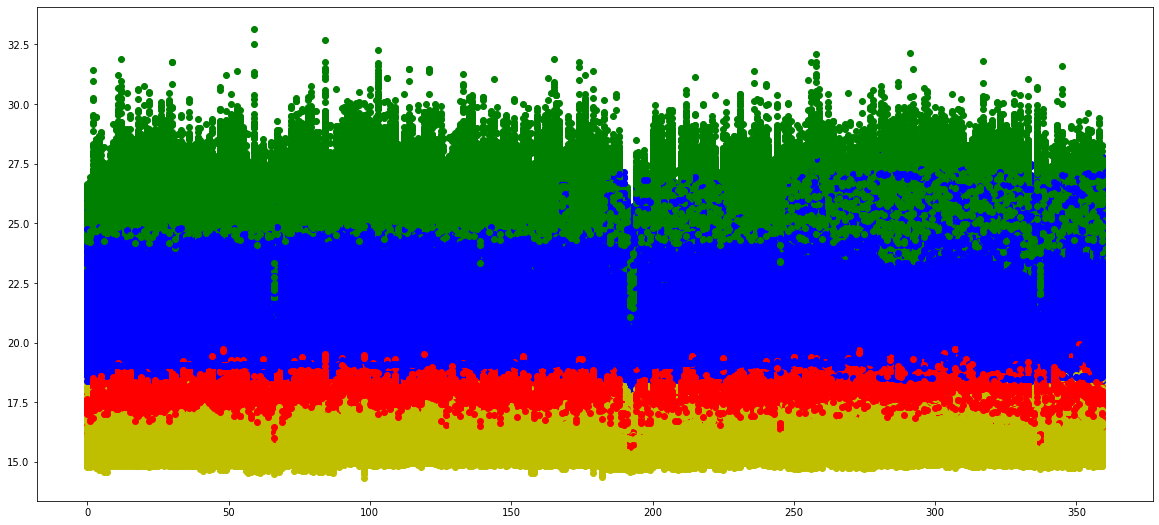

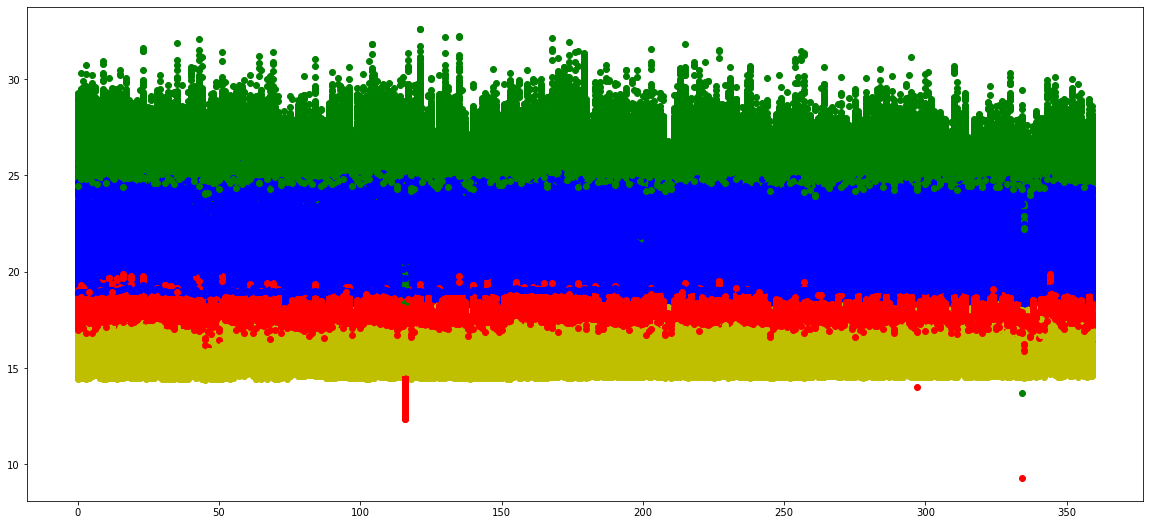

In [69]:
#テンソル元データの探索1


print("tensor")
t=input()
if t=="0":
    t1=ttensor_0
    t2=ttensor_1
elif t=="1":
    t1=ttensor_0
    t2=ttensor_2
elif t=="2":
    t1=ttensor_0
    t2=ttensor_all
elif t=="3":
    t1=ttensor_1
    t2=ttensor_2
elif t=="4":
    t1=ttensor_1
    t2=ttensor_all
elif t=="5":
    t1=ttensor_2
    t2=ttensor_all

height1=[]
height2=[]
height3=[]
height4=[]
print("time")

time=list(map(int, input().split(",")))
left=range(len(time))

print("space")
sel=list(map(int, input().split(",")))

plt.figure(figsize=(2*10,2*10))
plt.subplot(2,1,1)
cnt=0
h1a=0
h2a=0
h3a=0
h4a=0

for pt in sel:
    height1=[]
    height2=[]
    height3=[]
    height4=[]
    cnt=cnt+1
    for tt in time:
        height1.append(t1[tt,int(pt),0])
        height2.append(t1[tt,int(pt),1])
        height3.append(t1[tt,int(pt),2])
        height4.append(t1[tt,int(pt),3])
        
    p1 = plt.scatter(left, height1, color="b")
    p2 = plt.scatter(left, height2, color="g")
    p3 = plt.scatter(left, height3, color="r")
    p4 = plt.scatter(left, height4, color="y")
    h1a=h1a+np.average(height1)
    h2a=h2a+np.average(height2)
    h3a=h3a+np.average(height3)
    h4a=h4a+np.average(height4)

h1a=h1a/cnt
h2a=h2a/cnt
h3a=h3a/cnt
h4a=h4a/cnt
print("tensor1")
print("Average AirIn")
print(h1a)
print("Average AirOut")
print(h2a) 
print("Average CPU")
print(h3a) 
print("Average Water")
print(h4a)  
height1=[]
height2=[]
height3=[]
height4=[]
h1a=0
h2a=0
h3a=0
h4a=0

plt.figure(figsize=(2*10,2*10))
plt.subplot(2,1,1)
cnt=0
for pt in sel:
    height1=[]
    height2=[]
    height3=[]
    height4=[]
    cnt=cnt+1
    for tt in time:
        height1.append(t2[tt,int(pt),0])
        height2.append(t2[tt,int(pt),1])
        height3.append(t2[tt,int(pt),2])
        height4.append(t2[tt,int(pt),3])
        
    p1 = plt.scatter(left, height1, color="b")
    p2 = plt.scatter(left, height2, color="g")
    p3 = plt.scatter(left, height3, color="r")
    p4 = plt.scatter(left, height4, color="y")
    h1a=h1a+np.average(height1)
    h2a=h2a+np.average(height2)
    h3a=h3a+np.average(height3)
    h4a=h4a+np.average(height4)

h1a=h1a/cnt
h2a=h2a/cnt
h3a=h3a/cnt
h4a=h4a/cnt
print("tensor2")
print("Average AirIn")
print(h1a)
print("Average AirOut")
print(h2a) 
print("Average CPU")
print(h3a) 
print("Average Water")
print(h4a) 

因子数


 2


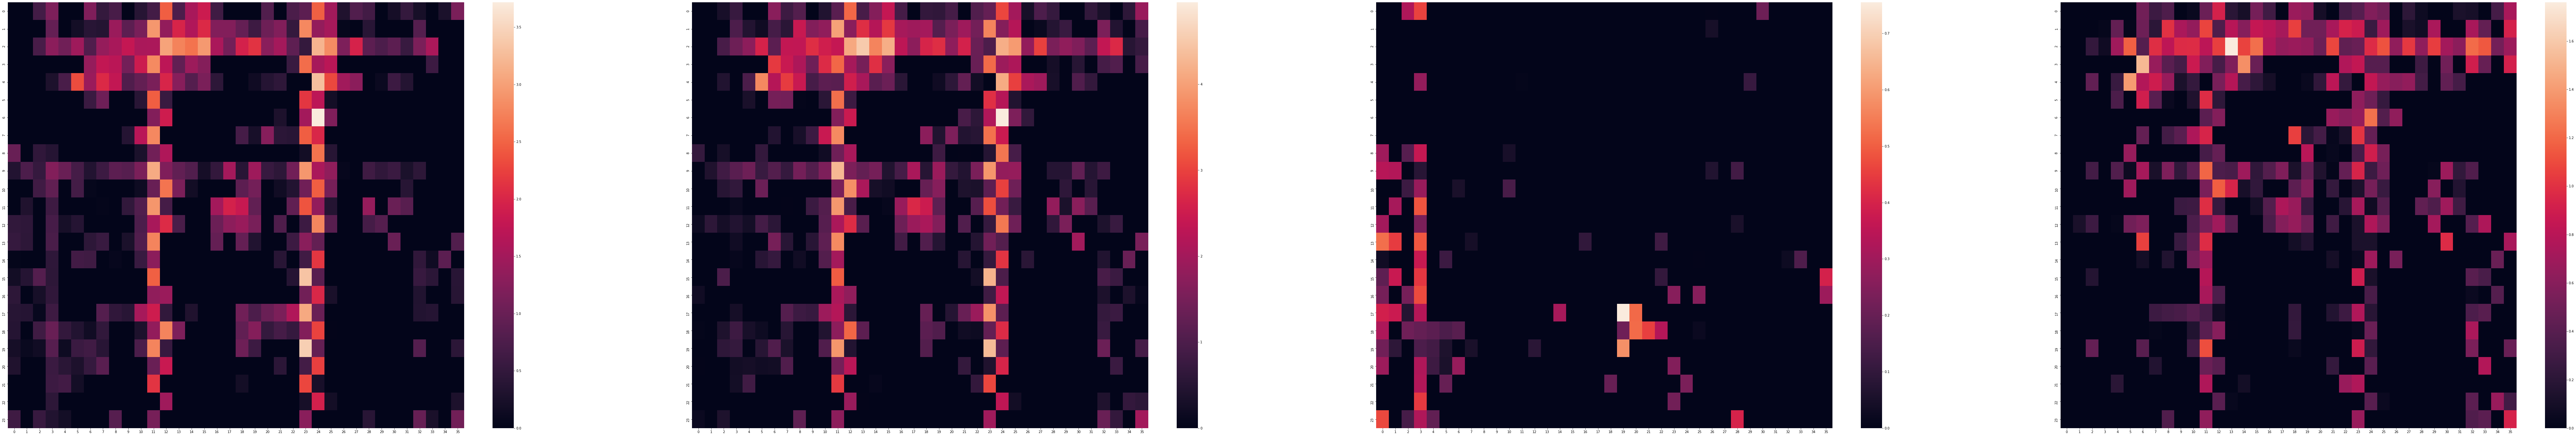

In [70]:
#元データの探索
print("因子数")
q=input()
#print("tensor")
#t=input()
if t=="0":
    bb1=b0[1][:,int(q)]
    bb2=b1[1][:,int(q)]    
elif t=="1":
    bb1=b0[1][:,int(q)]
    bb2=b2[1][:,int(q)]
elif t=="2":
    bb1=b0[1][:,int(q)]
    bb2=b3[1][:,int(q)]
elif t=="3":
    bb1=b1[1][:,int(q)]
    bb2=b2[1][:,int(q)]
elif t=="4":
    bb1=b1[1][:,int(q)]
    bb2=b3[1][:,int(q)]
elif t=="5":
    bb1=b2[1][:,int(q)]
    bb2=b3[1][:,int(q)]
    
    
"""
print("因子数")
q=input()
print("tensor")
t=input()
if t=="0":
    bb2=b0[1][:,int(q)]
elif t=="1":

elif t=="2":
    bb2=b2[1][:,int(q)]
elif t=="3":
    bb2=b3[1][:,int(q)]
"""


#print("space")
#sel=list(map(int, input().split(",")))

#print("一つ目")
tx1=np.zeros(864)
for i in sel:
    tx1[i]=bb1[i]
    #print(tx1[i])
#print("２つ目")
tx2=np.zeros(864)
for i in sel:
    tx2[i]=bb2[i]
    #print(tx2[i])

plt.figure(figsize=(144,24))
plt.subplot(1,4,1)
d1=tx1.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
sns.heatmap(d1)
plt.subplot(1,4,2)
d2=tx2.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
sns.heatmap(d2)
plt.subplot(1,4,3)
d3=(tx1-tx2).T.reshape(36,24).T
sns.heatmap(d3,vmin=0)
plt.subplot(1,4,4)
d4=(tx2-tx1).T.reshape(36,24).T
sns.heatmap(d4,vmin=0)
#sns.heatmap(d3)


In [ ]:
#元のデータ（正規化なし）
#print("tensor")
#t=input()
print("測定値コンポーネント")
q2=int(input())
if t=="0":
    t1=ttensor_0[:,:,q2]
    t2=ttensor_1[:,:,q2]
elif t=="1":
    t1=ttensor_0[:,:,q2]
    t2=ttensor_2[:,:,q2]
elif t=="2":
    t1=ttensor_0[:,:,q2]
    t2=ttensor_all[:,:,q2]
elif t=="3":
    t1=ttensor_1[:,:,q2]
    t2=ttensor_2[:,:,q2]
elif t=="4":
    t1=ttensor_1[:,:,q2]
    t2=ttensor_all[:,:,q2]
elif t=="5":
    t1=ttensor_2[:,:,q2]
    t2=ttensor_all[:,:,q2]
    

#print("space")
#sel=list(map(int, input().split(",")))

#print("time")
#tim=list(map(int, input().split(",")))


#print("一つ目")
tx1=np.zeros(864)
cnt=0
for i in sel:
    cnt=0
    for j in time:
        cnt=cnt+1
        tx1[i]=tx1[i]+t1[j,i]
    tx1[i]=tx1[i]/cnt

#print("２つ目")
tx2=np.zeros(864)
cnt=0
for i in sel:
    cnt=0
    for j in time:
        cnt=cnt+1
        tx2[i]=tx2[i]+t2[j,i]
    tx2[i]=tx2[i]/cnt
    #print(tx2[i])

mask = np.zeros((24,36))
mask[np.where(d1==0)] = True

plt.figure(figsize=(144,24))
plt.subplot(1,4,1)
d1=tx1.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
mask = np.zeros((24,36))
mask[np.where(d1==0)] = True
sns.heatmap(d1,mask=mask,linewidths=0.1,linecolor='black')
plt.subplot(1,4,2)
d2=tx2.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
mask = np.zeros((24,36))
mask[np.where(d2==0)] = True
sns.heatmap(d2,mask=mask,linewidths=0.1,linecolor='black')
plt.subplot(1,4,3)
d3=(tx1-tx2).T.reshape(36,24).T
mask = np.zeros((24,36))
mask[np.where(d2==0)] = True
sns.heatmap(d3,mask=mask,linewidths=0.1,linecolor='black',vmin=0)
#sns.heatmap(d3)
plt.subplot(1,4,4)
d4=(tx2-tx1).T.reshape(36,24).T
mask = np.zeros((24,36))
mask[np.where(d2==0)] = True
sns.heatmap(d4,mask=mask,linewidths=0.1,linecolor='black',vmin=0)

測定値コンポーネント


In [ ]:
#テンソル元データの探索1


print("tensor")
t="1"
if t=="0":
    t1=ttensor_0
    t2=ttensor_1
elif t=="1":
    t1=ttensor_0
    t2=ttensor_2
elif t=="2":
    t1=ttensor_0
    t2=ttensor_all
elif t=="3":
    t1=ttensor_1
    t2=ttensor_2
elif t=="4":
    t1=ttensor_1
    t2=ttensor_all
elif t=="5":
    t1=ttensor_2
    t2=ttensor_all

height1=[]
height2=[]
height3=[]
height4=[]
"""
print("time")

time=list(map(int, input().split(",")))
left=range(len(time))

print("space")
sel=list(map(int, input().split(",")))

"""
    
height1=[]
height2=[]
height3=[]
height4=[]


plt.figure(figsize=(2*10,2*10))
plt.subplot(2,1,1)
cnt=0
for pt in sel:
    height1=[]
    height2=[]
    height3=[]
    height4=[]
    cnt=cnt+1
    for tt in time:
        height1.append(t1[tt,int(pt),0])
        height2.append(t1[tt,int(pt),1])
        height3.append(t1[tt,int(pt),2])
        height4.append(t1[tt,int(pt),3])
        
    p1 = plt.scatter(left, height1, color="b")
    p2 = plt.scatter(left, height2, color="g")
    p3 = plt.scatter(left, height3, color="r")
    p4 = plt.scatter(left, height4, color="y")

    
height1=[]
height2=[]
height3=[]
height4=[]

plt.figure(figsize=(2*10,2*10))
plt.subplot(2,1,1)
cnt=0
for pt in sel:
    height1=[]
    height2=[]
    height3=[]
    height4=[]
    cnt=cnt+1
    for tt in time:
        height1.append(t2[tt,int(pt),0])
        height2.append(t2[tt,int(pt),1])
        height3.append(t2[tt,int(pt),2])
        height4.append(t2[tt,int(pt),3])
        
    p1 = plt.scatter(left, height1, color="b")
    p2 = plt.scatter(left, height2, color="g")
    p3 = plt.scatter(left, height3, color="r")
    p4 = plt.scatter(left, height4, color="y")

In [ ]:
#元データの探索
#print("因子数")
#q=input()
#print("tensor")
#t=input()
if t=="0":
    bb1=b0[1][:,int(q)]
    bb2=b1[1][:,int(q)]    
elif t=="1":
    bb1=b0[1][:,int(q)]
    bb2=b2[1][:,int(q)]
elif t=="2":
    bb1=b0[1][:,int(q)]
    bb2=b3[1][:,int(q)]
elif t=="3":
    bb1=b1[1][:,int(q)]
    bb2=b2[1][:,int(q)]
elif t=="4":
    bb1=b1[1][:,int(q)]
    bb2=b3[1][:,int(q)]
elif t=="5":
    bb1=b2[1][:,int(q)]
    bb2=b3[1][:,int(q)]
    
    
"""
print("因子数")
q=input()
print("tensor")
t=input()
if t=="0":
    bb2=b0[1][:,int(q)]
elif t=="1":

elif t=="2":
    bb2=b2[1][:,int(q)]
elif t=="3":
    bb2=b3[1][:,int(q)]
"""


#print("space")
#sel=list(map(int, input().split(",")))

#print("一つ目")
tx1=np.zeros(864)
for i in sel:
    tx1[i]=bb1[i]
    #print(tx1[i])
#print("２つ目")
tx2=np.zeros(864)
for i in sel:
    tx2[i]=bb2[i]
    #print(tx2[i])

plt.figure(figsize=(108,24))
plt.subplot(1,3,1)
d1=tx1.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
sns.heatmap(d1)
plt.subplot(1,3,2)
d2=tx2.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
sns.heatmap(d2)
plt.subplot(1,3,3)
d3=(tx1-tx2).T.reshape(36,24).T
sns.heatmap(d3,vmin=0)
#sns.heatmap(d3)


In [ ]:
#元のデータ（正規化なし）
#print("tensor")
#t=input()
#print("測定値コンポーネント")
#q2=int(input())
if t=="0":
    t1=ttensor_0[:,:,q2]
    t2=ttensor_1[:,:,q2]
elif t=="1":
    t1=ttensor_0[:,:,q2]
    t2=ttensor_2[:,:,q2]
elif t=="2":
    t1=ttensor_0[:,:,q2]
    t2=ttensor_all[:,:,q2]
elif t=="3":
    t1=ttensor_1[:,:,q2]
    t2=ttensor_2[:,:,q2]
elif t=="4":
    t1=ttensor_1[:,:,q2]
    t2=ttensor_all[:,:,q2]
elif t=="5":
    t1=ttensor_2[:,:,q2]
    t2=ttensor_all[:,:,q2]
    

#print("space")
#sel=list(map(int, input().split(",")))

#print("time")
#tim=list(map(int, input().split(",")))


#print("一つ目")
tx1=np.zeros(864)
cnt=0
for i in sel:
    cnt=0
    for j in time:
        cnt=cnt+1
        tx1[i]=tx1[i]+t1[j,i]
    tx1[i]=tx1[i]/cnt

#print("２つ目")
tx2=np.zeros(864)
cnt=0
for i in sel:
    cnt=0
    for j in time:
        cnt=cnt+1
        tx2[i]=tx2[i]+t2[j,i]
    tx2[i]=tx2[i]/cnt
    #print(tx2[i])

mask = np.zeros((24,36))
mask[np.where(d1==0)] = True

plt.figure(figsize=(108,24))
plt.subplot(1,3,1)
d1=tx1.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
mask = np.zeros((24,36))
mask[np.where(d1==0)] = True
sns.heatmap(d1,mask=mask,linewidths=0.1,linecolor='black')
plt.subplot(1,3,2)
d2=tx2.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
mask = np.zeros((24,36))
mask[np.where(d2==0)] = True
sns.heatmap(d2,mask=mask,linewidths=0.1,linecolor='black')
plt.subplot(1,3,3)
d3=(tx1-tx2).T.reshape(36,24).T
mask = np.zeros((24,36))
mask[np.where(d2==0)] = True
sns.heatmap(d3,mask=mask,linewidths=0.1,linecolor='black',vmin=0)
#sns.heatmap(d3)


In [ ]:
#テンソル元データの探索1


print("tensor")
t="2"
if t=="0":
    t1=ttensor_0
    t2=ttensor_1
elif t=="1":
    t1=ttensor_0
    t2=ttensor_2
elif t=="2":
    t1=ttensor_0
    t2=ttensor_all
elif t=="3":
    t1=ttensor_1
    t2=ttensor_2
elif t=="4":
    t1=ttensor_1
    t2=ttensor_all
elif t=="5":
    t1=ttensor_2
    t2=ttensor_all

height1=[]
height2=[]
height3=[]
height4=[]
"""
print("time")

time=list(map(int, input().split(",")))
left=range(len(time))

print("space")
sel=list(map(int, input().split(",")))

"""
    
height1=[]
height2=[]
height3=[]
height4=[]


plt.figure(figsize=(2*10,2*10))
plt.subplot(2,1,1)
cnt=0
for pt in sel:
    height1=[]
    height2=[]
    height3=[]
    height4=[]
    cnt=cnt+1
    for tt in time:
        height1.append(t1[tt,int(pt),0])
        height2.append(t1[tt,int(pt),1])
        height3.append(t1[tt,int(pt),2])
        height4.append(t1[tt,int(pt),3])
        
    p1 = plt.scatter(left, height1, color="b")
    p2 = plt.scatter(left, height2, color="g")
    p3 = plt.scatter(left, height3, color="r")
    p4 = plt.scatter(left, height4, color="y")
    
    
    
height1=[]
height2=[]
height3=[]
height4=[]

plt.figure(figsize=(2*10,2*10))
plt.subplot(2,1,1)
cnt=0
for pt in sel:
    height1=[]
    height2=[]
    height3=[]
    height4=[]
    cnt=cnt+1
    for tt in time:
        height1.append(t2[tt,int(pt),0])
        height2.append(t2[tt,int(pt),1])
        height3.append(t2[tt,int(pt),2])
        height4.append(t2[tt,int(pt),3])
        
    p1 = plt.scatter(left, height1, color="b")
    p2 = plt.scatter(left, height2, color="g")
    p3 = plt.scatter(left, height3, color="r")
    p4 = plt.scatter(left, height4, color="y")
    

In [ ]:
#元データの探索
#print("因子数")
#q=input()
#print("tensor")
#t=input()
if t=="0":
    bb1=b0[1][:,int(q)]
    bb2=b1[1][:,int(q)]    
elif t=="1":
    bb1=b0[1][:,int(q)]
    bb2=b2[1][:,int(q)]
elif t=="2":
    bb1=b0[1][:,int(q)]
    bb2=b3[1][:,int(q)]
elif t=="3":
    bb1=b1[1][:,int(q)]
    bb2=b2[1][:,int(q)]
elif t=="4":
    bb1=b1[1][:,int(q)]
    bb2=b3[1][:,int(q)]
elif t=="5":
    bb1=b2[1][:,int(q)]
    bb2=b3[1][:,int(q)]
    
    
"""
print("因子数")
q=input()
print("tensor")
t=input()
if t=="0":
    bb2=b0[1][:,int(q)]
elif t=="1":

elif t=="2":
    bb2=b2[1][:,int(q)]
elif t=="3":
    bb2=b3[1][:,int(q)]
"""


#print("space")
#sel=list(map(int, input().split(",")))

#print("一つ目")
tx1=np.zeros(864)
for i in sel:
    tx1[i]=bb1[i]
    #print(tx1[i])
#print("２つ目")
tx2=np.zeros(864)
for i in sel:
    tx2[i]=bb2[i]
    #print(tx2[i])

plt.figure(figsize=(108,24))
plt.subplot(1,3,1)
d1=tx1.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
sns.heatmap(d1)
plt.subplot(1,3,2)
d2=tx2.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
sns.heatmap(d2)
plt.subplot(1,3,3)
d3=(tx1-tx2).T.reshape(36,24).T
sns.heatmap(d3,vmin=0)
#sns.heatmap(d3)


In [ ]:
#元のデータ（正規化なし）
#print("tensor")
#t=input()
#print("測定値コンポーネント")
#q2=int(input())
if t=="0":
    t1=ttensor_0[:,:,q2]
    t2=ttensor_1[:,:,q2]
elif t=="1":
    t1=ttensor_0[:,:,q2]
    t2=ttensor_2[:,:,q2]
elif t=="2":
    t1=ttensor_0[:,:,q2]
    t2=ttensor_all[:,:,q2]
elif t=="3":
    t1=ttensor_1[:,:,q2]
    t2=ttensor_2[:,:,q2]
elif t=="4":
    t1=ttensor_1[:,:,q2]
    t2=ttensor_all[:,:,q2]
elif t=="5":
    t1=ttensor_2[:,:,q2]
    t2=ttensor_all[:,:,q2]
    

#print("space")
#sel=list(map(int, input().split(",")))

#print("time")
#tim=list(map(int, input().split(",")))


#print("一つ目")
tx1=np.zeros(864)
cnt=0
for i in sel:
    cnt=0
    for j in time:
        cnt=cnt+1
        tx1[i]=tx1[i]+t1[j,i]
    tx1[i]=tx1[i]/cnt

#print("２つ目")
tx2=np.zeros(864)
cnt=0
for i in sel:
    cnt=0
    for j in time:
        cnt=cnt+1
        tx2[i]=tx2[i]+t2[j,i]
    tx2[i]=tx2[i]/cnt
    #print(tx2[i])

mask = np.zeros((24,36))
mask[np.where(d1==0)] = True

plt.figure(figsize=(108,24))
plt.subplot(1,3,1)
d1=tx1.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
mask = np.zeros((24,36))
mask[np.where(d1==0)] = True
sns.heatmap(d1,mask=mask,linewidths=0.1,linecolor='black')
plt.subplot(1,3,2)
d2=tx2.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
mask = np.zeros((24,36))
mask[np.where(d2==0)] = True
sns.heatmap(d2,mask=mask,linewidths=0.1,linecolor='black')
plt.subplot(1,3,3)
d3=(tx1-tx2).T.reshape(36,24).T
mask = np.zeros((24,36))
mask[np.where(d2==0)] = True
sns.heatmap(d3,mask=mask,linewidths=0.1,linecolor='black',vmin=0)
#sns.heatmap(d3)


違う問題が出てきた。比較として成り立っていないかもしれない
比較として成り立たせるためには、空間軸で比べるには、測定値の軸の特徴行列の値を合わせる必要がある気がする。
測定値軸の値を合わせないと、測定値でどこが大事かで、結構値が変わるかもしれん
→そのためのbokehプロットで値を合わせに行き比較することができる。

In [ ]:
print(ttensor_0[:,:,1])

In [ ]:
#元のデータ（正規化なし）
print("tensor")
t=input()
print("因子数")
q=int(input())
if t=="0":
    t1=ttensor_0[:,:,q]
    t2=ttensor_1[:,:,q]
elif t=="1":
    t1=ttensor_0[:,:,q]
    t2=ttensor_2[:,:,q]
elif t=="2":
    t1=ttensor_0[:,:,q]
    t2=ttensor_all[:,:,q]
elif t=="3":
    t1=ttensor_1[:,:,q]
    t2=ttensor_2[:,:,q]
elif t=="4":
    t1=ttensor_1[:,:,q]
    t2=ttensor_all[:,:,q]
elif t=="5":
    t1=ttensor_2[:,:,q]
    t2=ttensor_all[:,:,q]
    

print("space")
sel=list(map(int, input().split(",")))

print("time")
tim=list(map(int, input().split(",")))


#print("一つ目")
tx1=np.zeros(864)
cnt=0
for i in sel:
    cnt=0
    for j in tim:
        cnt=cnt+1
        tx1[i]=tx1[i]+t1[j,i]
    tx1[i]=tx1[i]/cnt

#print("２つ目")
tx2=np.zeros(864)
cnt=0
for i in sel:
    cnt=0
    for j in tim:
        cnt=cnt+1
        tx2[i]=tx2[i]+t2[j,i]
    tx2[i]=tx2[i]/cnt
    #print(tx2[i])

mask = np.zeros((24,36))
mask[np.where(d1==0)] = True

plt.figure(figsize=(108,24))
plt.subplot(1,3,1)
d1=tx1.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
mask = np.zeros((24,36))
mask[np.where(d1==0)] = True
sns.heatmap(d1,mask=mask,linewidths=0.1,linecolor='black')
plt.subplot(1,3,2)
d2=tx2.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
mask = np.zeros((24,36))
mask[np.where(d2==0)] = True
sns.heatmap(d2,mask=mask,linewidths=0.1,linecolor='black')
plt.subplot(1,3,3)
d3=(tx1-tx2).T.reshape(36,24).T
mask = np.zeros((24,36))
mask[np.where(d2==0)] = True
sns.heatmap(d3,mask=mask,linewidths=0.1,linecolor='black')
#sns.heatmap(d3)


In [ ]:
#元のデータ（正規化あり）
print("tensor組み合わせ")
t=input()
print("因子数")
q=int(input())
if t=="0":
    t1=tensor_0[:,:,q]
    t2=tensor_1[:,:,q]
elif t=="1":
    t1=tensor_0[:,:,q]
    t2=tensor_2[:,:,q]
elif t=="2":
    t1=tensor_0[:,:,q]
    t2=tensor_all[:,:,q]
elif t=="3":
    t1=tensor_1[:,:,q]
    t2=tensor_2[:,:,q]
elif t=="4":
    t1=tensor_1[:,:,q]
    t2=tensor_all[:,:,q]
elif t=="5":
    t1=tensor_2[:,:,q]
    t2=tensor_all[:,:,q]
    

print("space")
sel=list(map(int, input().split(",")))

print("time")
tim=list(map(int, input().split(",")))


#print("一つ目")
tx1=np.zeros(864)
cnt=0
for i in sel:
    cnt=0
    for j in tim:
        cnt=cnt+1
        tx1[i]=tx1[i]+t1[j,i]
    tx1[i]=tx1[i]/cnt

#print("２つ目")
tx2=np.zeros(864)
cnt=0
for i in sel:
    cnt=0
    for j in tim:
        cnt=cnt+1
        tx2[i]=tx2[i]+t2[j,i]
    tx2[i]=tx2[i]/cnt
    #print(tx2[i])

mask = np.zeros((24,36))
mask[np.where(d1==0)] = True

plt.figure(figsize=(108,24))
plt.subplot(1,3,1)
d1=tx1.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
mask = np.zeros((24,36))
mask[np.where(d1==0)] = True
sns.heatmap(d1,mask=mask,linewidths=0.1,linecolor='black')
plt.subplot(1,3,2)
d2=tx2.T.reshape(36,24).T
#sns.heatmap(d,vmin=0, vmax=1)
mask = np.zeros((24,36))
mask[np.where(d2==0)] = True
sns.heatmap(d2,mask=mask,linewidths=0.1,linecolor='black')
plt.subplot(1,3,3)
d3=(tx1-tx2).T.reshape(36,24).T
mask = np.zeros((24,36))
mask[np.where(d2==0)] = True
sns.heatmap(d3,mask=mask,linewidths=0.1,linecolor='black')
#sns.heatmap(d3)


In [ ]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
for pt in range(859,863):
  cnt=cnt+1
  plt.subplot(2,2,cnt)
  left=t0[:,pt,0]
  height=t0[:,pt,1]
  p1 = plt.scatter(left, height, linewidth=2)
  left=t1[:,pt,0]
  height=t1[:,pt,1]
  p2 = plt.scatter(left, height, linewidth=2)
  """

In [ ]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
for pt in range(0,4):
  cnt=cnt+1
  plt.subplot(2,2,cnt)
  left=t0[:,pt,2]
  height=t0[:,pt,1]
  p1 = plt.scatter(left, height, linewidth=2)
  left=t1[:,pt,2]
  height=t1[:,pt,1]
  p2 = plt.scatter(left, height, linewidth=2)
  """

In [ ]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
for pt in range(859,863):
  cnt=cnt+1
  plt.subplot(2,2,cnt)
  left=t0[:,pt,0]
  height=t0[:,pt,3]
  p1 = plt.scatter(left, height, linewidth=2)
  left=t1[:,pt,0]
  height=t1[:,pt,3]
  p2 = plt.scatter(left, height, linewidth=2)
  """

In [ ]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
for pt in range(859,863):
  cnt=cnt+1
  plt.subplot(2,2,cnt)
  left=t0[:,pt,0]
  height=t0[:,pt,3]
  p1 = plt.scatter(left, height, linewidth=2)
  left=t1[:,pt,0]
  height=t1[:,pt,3]
  p2 = plt.scatter(left, height, linewidth=2)
  """

In [ ]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
pt=863
for n in range(0,4):
  for m in range(0,4):
    if n>=m: continue
    cnt=cnt+1
    plt.subplot(3,2,cnt)
    left=t0[:,pt,n]
    height=t0[:,pt,m]
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    p1 = plt.scatter(left, height, linewidth=2)
    left=t1[:,pt,n]
    height=t1[:,pt,m]
    p2 = plt.scatter(left, height, linewidth=2)
    plt.title(str(n)+str(m))
"""

In [ ]:
"""
cnt=0
plt.figure(figsize=(2*10,2*10))
pt=1
for n in range(0,4):
  for m in range(0,4):
    if n>=m: continue
    cnt=cnt+1
    plt.subplot(3,2,cnt)
    left=t0[:,pt,n]
    height=t0[:,pt,m]
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    p1 = plt.scatter(left, height, linewidth=2)
    left=t1[:,pt,n]
    height=t1[:,pt,m]
    p2 = plt.scatter(left, height, linewidth=2)
    plt.title(str(n)+str(m))
"""

In [ ]:
"""
pt=863
print(0)
dist = np.linalg.norm(t1[:117,pt,0]-t0[:117,pt,0])
print(dist)
print(1)
dist = np.linalg.norm(t1[:117,pt,1]-t0[:117,pt,1])
print(dist)
print(2)
dist = np.linalg.norm(t1[:117,pt,2]-t0[:117,pt,2])
print(dist)
print(3)
dist = np.linalg.norm(t1[:117,pt,3]-t0[:117,pt,3])
print(dist)
"""

In [ ]:
"""
pt=0
print(0)
dist = np.linalg.norm(t1[:117,pt,0]-t0[:117,pt,0])
print(dist)
print(1)
dist = np.linalg.norm(t1[:117,pt,1]-t0[:117,pt,1])
print(dist)
print(2)
dist = np.linalg.norm(t1[:117,pt,2]-t0[:117,pt,2])
print(dist)
print(3)
dist = np.linalg.norm(t1[:117,pt,3]-t0[:117,pt,3])
print(dist)
"""

In [ ]:
"""
for pt in range(864):
  print(pt)
  dist = np.linalg.norm(t1[:117,pt,:]-t0[:117,pt,:])
  print(dist)
"""

違いが大きいほうが散らばりが大きいのが見てわかる、これを類似度図るからのその変数の組み合わせから何が原因となっているのか探る、テンソルコアの書き換え

再度12のところでグループ分けするのもありかも

今はラックだけの要素を用いて比較しているが、他の要素を使うべきやと思う

In [ ]:
"""
pt=863
plt.figure(figsize=(2*10,2*10))
left=range(221)
height1=t0[:,pt,0]
height2=t0[:,pt,1]
height3=t0[:,pt,2]
height4=t0[:,pt,3]
plt.subplot(1,2,1)
p1 = plt.plot(left, height1, linewidth=2)
p2 = plt.plot(left, height2, linewidth=2)
p3 = plt.plot(left, height3, linewidth=2)
p4 = plt.plot(left, height4, linewidth=2)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)
left=range(117)
height1=t1[:,pt,0]
height2=t1[:,pt,1]
height3=t1[:,pt,2]
height4=t1[:,pt,3]
plt.subplot(1,2,2)
p1 = plt.plot(left, height1, linewidth=2)
p2 = plt.plot(left, height2, linewidth=2)
p3 = plt.plot(left, height3, linewidth=2)
p4 = plt.plot(left, height4, linewidth=2)
plt.legend((p1[0], p2[0],p3[0], p4[0]), ("Class 1", "Class 2","Class 3", "Class 4"), loc=4)
"""

ここからもう一度テンソルに戻って、一個の要素を固定したり、影響力が大きいところの実際の数値の確認

## 要素の削除と再テンソル化

In [ ]:
"""
#axis=0,奥行,axis=1,行、axis=2,列
def spaceDelete(t,n):
  np.delete(t,n,axis=1)

#axis=0,奥行,axis=1,行、axis=2,列
def timeDelete(t,n):
  np.delete(t,n,axis=2)

def measureDelete(t,n):
  np.delete(t,n,axis=0)

"""


In [ ]:

"""
#multidelete
#axis=0,奥行,axis=1,行、axis=2,列
def spaceMultiDelete(n):
  t0=np.delete(tensor_0,n,axis=1)
  t1=np.delete(tensor_1,n,axis=1)
  t2=np.delete(tensor_2,n,axis=1)
  t3=np.delete(tensor_all,n,axis=1)
  return t0,t1,t2,t3
"""


In [ ]:
#nt0,nt1,nt2,nt3=spaceMultiDelete(153)

In [ ]:
#plotFream(nt0,nt1,nt2,nt3,rank_list)

空間軸方向でも、umapなどでテンソルを作る

In [ ]:
"""
def plotData(pltdata):
  plt.figure(figsize=(12, 12))
  plt.scatter(pltdata[:,0], pltdata[:,1], s=3)
  plt.colorbar()
  plt.grid()
  plt.show()
"""


In [ ]:
!pip3 install umap-learn

In [ ]:
"""
import umap
from scipy.sparse.csgraph import connected_components
# 公式GitHubには書いてあるのですが、↑を書かないとエラーが出てしまいます。
"""



In [ ]:
"""

tt0,u0=ntd(tensor_0,rank_list)
a0,b0=non_negative_tucker_core(tensor_0,rank_list,tt0)
a1,b1=non_negative_tucker_core(tensor_1,rank_list,tt0)
a2,b2=non_negative_tucker_core(tensor_2,rank_list,tt0)
a3,b3=non_negative_tucker_core(tensor_all,rank_list,tt0)

"""



In [ ]:
#k=tensor_all.shape

In [ ]:
#ten1=tensor_all.transpose(0,2,1).reshape(k[2]*k[1],k[0])

In [ ]:
#print(ten1.T.shape)

In [ ]:
#distance=np.linalg.norm(b0[1]-b3[1])
#print(distance)

In [ ]:
#%time res_umap = umap.UMAP().fit_transform(b1[0])
#print(res_umap.shape)

In [ ]:
#plotData(res_umap)

https://qiita.com/khigashi02/items/17f69da4851c71d8a0dc

インタラクティブな可視化

https://www.jstage.jst.go.jp/article/tjsai/30/6/30_30-6_JWEIN-E/_pdf/-char/ja

この論文を隅まで読む

## bokeh